## Homework #5. Crowdsourcing tools review
#### Author: `Yuliia Verbivska`
#### Total time spent on h/w (in minutes): `3452 –≥–æ–¥–∏–Ω–∏`

In [180]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcairo
mpl.use("module://mplcairo.tk")
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

In [181]:
from wordcloud import WordCloud, STOPWORDS
import advertools as adv

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
DIALOGS_MERGED_DATA_PATH = "D:/Naukma/DS/telegram-data-collection-master/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/Naukma/DS/telegram-data-collection-master/data/merged_data/dialogs_users_all.csv"

In [184]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, dtype={'from_id':str, 'to_id':str, 'date':str})
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
df

id                       date                      from_id  \
0         51085  2022-04-10 19:05:00+00:00                          NaN   
1         51083  2022-04-10 18:53:28+00:00                          NaN   
2         51082  2022-04-10 18:27:27+00:00                          NaN   
3         51081  2022-04-10 18:13:16+00:00                          NaN   
4         51080  2022-04-10 18:02:41+00:00                          NaN   
...         ...                        ...                          ...   
1190069  358045  2021-06-11 19:07:15+00:00  PeerUser(user_id=342667961)   
1190070  358044  2021-06-11 19:07:15+00:00  PeerUser(user_id=342667961)   
1190071  358043  2021-06-11 19:07:15+00:00  PeerUser(user_id=342667961)   
1190072  358042  2021-06-11 19:07:15+00:00  PeerUser(user_id=342667961)   
1190073  358041  2021-06-11 19:07:15+00:00  PeerUser(user_id=342667961)   

                                      to_id  \
0        PeerChannel(channel_id=1049320233)   
1        PeerChannel(channel_id=1049320233)   
2        PeerChannel(channel_id=1049320233)   
3        PeerChannel(channel_id=1049320233)   
4        PeerChannel(channel_id=1049320233)   
...                                     ...   
1190069                           970766368   
1190070                           970766368   
1190071                           970766368   
1190072                           970766368   
1190073                           970766368   

                                                  fwd_from  \
0                                                      NaN   
1                                                      NaN   
2        MessageFwdHeader(date=datetime.datetime(2022, ...   
3        MessageFwdHeader(date=datetime.datetime(2022, ...   
4                                                      NaN   
...                                                    ...   
1190069                                                NaN   
1190070                                                NaN   
1190071                                                NaN   
1190072                                                NaN   
1190073                                                NaN   

                                                   message   type  duration  \
0                                          –ê –º–æ–∂–µ –π –±—ñ–ª—å—à–µ  photo       NaN   
1                                                      NaN  photo       NaN   
2        ‚ö°Ô∏è–ú–∞–∫—Ä–æ–Ω –æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö —ç–∫–∑–∏—Ç-–ø–æ–ª–∞ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é...   text       NaN   
3        –ë–∏—Ç–≤–∞ –∑–∞ –∫–æ–∂–Ω–µ –º—ñ—Å—Ç–æ —ñ —Å–µ–ª–æ –Ω–∞—à–æ—ó –∫—Ä–∞—ó–Ω–∏ –≤–∞—Ä—Ç–∞...  video     119.0   
4                               –ú–∞–∫—Ä–æ–Ω - 28%\n–õ–µ –ü–µ–Ω - 23%   text       NaN   
...                                                    ...    ...       ...   
1190069                                                NaN  photo       NaN   
1190070                                                NaN  photo       NaN   
1190071                                                NaN  photo       NaN   
1190072                                                NaN  photo       NaN   
1190073                                                NaN  photo       NaN   

             dialog_id  
0       -1001049320233  
1       -1001049320233  
2       -1001049320233  
3       -1001049320233  
4       -1001049320233  
...                ...  
1190069      970766368  
1190070      970766368  
1190071      970766368  
1190072      970766368  
1190073      970766368  

[1190074 rows x 9 columns]

In [185]:
df_meta


dialog_id                   name            type  \
0    -1001124109395             –§—ñ–ª—ñ–∞–ª –ö–ú–¶           Group   
1    -1001124109395             –§—ñ–ª—ñ–∞–ª –ö–ú–¶           Group   
2    -1001124109395             –§—ñ–ª—ñ–∞–ª –ö–ú–¶           Group   
3    -1001124109395             –§—ñ–ª—ñ–∞–ª –ö–ú–¶           Group   
4    -1001124109395             –§—ñ–ª—ñ–∞–ª –ö–ú–¶           Group   
...             ...                    ...             ...   
7259      726008022                filosof  Private dialog   
7260      765503081  Oleksiy Kashpirovskiy  Private dialog   
7261      770605699        Yulia Stoliaruk  Private dialog   
7262      817903784                  annna  Private dialog   
7263      855734991         –ë–æ–≥–¥–∞–Ω –ó–≤–µ—Ä—å–æ–∫  Private dialog   

                                                  users  
0     {'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω–∏...  
1     {'user_id': 230295237, 'first_name': '–í–∞–ª–µ–Ω—Ç–∏–π...  
2     {'user_id': 544701196, 'first_name': '–Ø—Ä–æ—Å–ª–∞–≤'...  
3     {'user_id': 455550602, 'first_name': '–ê–Ω–¥—Ä—ñ–π–∫–æ...  
4     {'user_id': 478826760, 'first_name': '–ë–∞–≥–ª–µ–π',...  
...                                                 ...  
7259  {'user_id': 726008022, 'first_name': 'filosof'...  
7260  {'user_id': 765503081, 'first_name': 'Oleksiy'...  
7261  {'user_id': 770605699, 'first_name': 'Yulia', ...  
7262  {'user_id': 817903784, 'first_name': 'annna', ...  
7263  {'user_id': 855734991, 'first_name': '–ë–æ–≥–¥–∞–Ω',...  

[7264 rows x 4 columns]

In [186]:
chat_users = {}
for dialog in df_meta['dialog_id']:
    users = []
    for user in df_meta[df_meta['dialog_id']==dialog]['users']:
        users.append(user)
    chat_users[dialog] = users

In [187]:
df_merged = df_meta.copy()
users = []
for dialog in df_merged['dialog_id']:
    users.append(chat_users[dialog])

df_merged['users'] = users
df_merged = df_merged.drop_duplicates(subset = 'dialog_id', keep = 'first')
df_merged = pd.merge(df, df_merged, on = "dialog_id")
df_merged.rename(columns = {'type_x':'type_message', 'type_y':'type_dialog'}, inplace = True)

In [188]:
df_meta.head(1)

dialog_id        name   type  \
0 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶  Group   

                                               users  
0  {'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω–∏...

In [189]:
df_merged.head(10)

id                       date                       from_id  \
0  699051  2022-04-08 16:02:57+00:00   PeerUser(user_id=312918817)   
1  699050  2022-04-06 18:52:12+00:00   PeerUser(user_id=255144521)   
2  699049  2022-04-01 13:11:54+00:00   PeerUser(user_id=255144521)   
3  699048  2022-03-19 14:33:39+00:00   PeerUser(user_id=255144521)   
4  699047  2022-03-18 15:28:00+00:00   PeerUser(user_id=255144521)   
5  699046  2022-03-16 18:40:22+00:00  PeerUser(user_id=5223568697)   
6  699045  2022-03-16 17:49:45+00:00   PeerUser(user_id=255144521)   
7  699044  2022-03-14 19:11:40+00:00   PeerUser(user_id=255144521)   
8  699043  2022-03-13 10:44:44+00:00   PeerUser(user_id=255144521)   
9  699042  2022-03-10 15:06:02+00:00  PeerUser(user_id=1347119114)   

                                to_id  \
0  PeerChannel(channel_id=1124109395)   
1  PeerChannel(channel_id=1124109395)   
2  PeerChannel(channel_id=1124109395)   
3  PeerChannel(channel_id=1124109395)   
4  PeerChannel(channel_id=1124109395)   
5  PeerChannel(channel_id=1124109395)   
6  PeerChannel(channel_id=1124109395)   
7  PeerChannel(channel_id=1124109395)   
8  PeerChannel(channel_id=1124109395)   
9  PeerChannel(channel_id=1124109395)   

                                            fwd_from  \
0                                                NaN   
1  MessageFwdHeader(date=datetime.datetime(2022, ...   
2  MessageFwdHeader(date=datetime.datetime(2022, ...   
3  MessageFwdHeader(date=datetime.datetime(2022, ...   
4  MessageFwdHeader(date=datetime.datetime(2022, ...   
5                                                NaN   
6  MessageFwdHeader(date=datetime.datetime(2022, ...   
7                                                NaN   
8  MessageFwdHeader(date=datetime.datetime(2022, ...   
9                                                NaN   

                                             message type_message  duration  \
0                                                NaN         text       NaN   
1  –®–∞–Ω–æ–≤–Ω—ñ –∫–æ–ª–µ–≥–∏ —Ç–∞ –¥—Ä—É–∑—ñ, –∑–≤–µ—Ä—Ç–∞—é—Å—å –¥–æ –í–∞—Å –ø—Ä–æ ...        photo       NaN   
2  –í–æ–ª–æ–Ω—Ç–µ—Ä—Å—Ç–≤–æ –Ω–∞ –¥–µ—Ä–∂–∞–≤–Ω—ñ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ñ –°–ø—ñ–≤–î—ñ—è - ...        photo       NaN   
3  –ó–∞–≤—Ç—Ä–∞ 20.03.2022 —Ä. –æ—Ä—ñ—î–Ω—Ç–æ–≤–Ω–æ –ø—ñ—Å–ª—è –æ–±—ñ–¥—É –∑ ...         text       NaN   
4  ‚ùóÔ∏è–î—Ä—É–∑—ñ, –∑–∞–≤—Ç—Ä–∞ 19.03 –æ 9:00 –≤–∏—ó–∂–¥–∂–∞—Ç–∏–º—É—Ç—å –∞–≤—Ç...         text       NaN   
5                                                NaN         text       NaN   
6  –ü—Ä–∏–≤—ñ—Ç. –Ø–∫—â–æ —Ö—Ç–æ—Å—å –º–∞—î —á–∞—Å —Ç–∞ –±–∞–∂–∞–Ω–Ω—è –¥–æ–ø–æ–º–æ–≥—Ç...         text       NaN   
7  –ü–∞–Ω–æ–≤–µ, –ø—Ä–∏–≤—ñ—Ç!\n\n–í –º–µ–Ω–µ –∑–∞—Ä–∞–∑ –¥—Ä—É–≥ –∑–∞–π–º–∞—î—Ç—å—Å...         text       NaN   
8  –†–µ–±—è—Ç, –Ω—É–∂–Ω—ã –∫–æ–Ω—Ç–∞–∫—Ç—ã –≥–ª–∞–≤ –≤–æ–ª–æ–Ω—Ç—ë—Ä—Å–∫–∏—Ö –≥—Ä—É–ø–ø ...         text       NaN   
9  –ö–æ–ª–µ–≥–∏ @thegreatpretender @annagnatenkoo @bogd...         text       NaN   

       dialog_id        name type_dialog  \
0 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
1 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
2 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
3 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
4 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
5 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
6 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
7 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
8 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   
9 -1001124109395  –§—ñ–ª—ñ–∞–ª –ö–ú–¶       Group   

                                               users  
0  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
1  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
2  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
3  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
4  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
5  [{'user_id': 353330283, 'first_name': '–ü–æ–ª–∫–æ–≤–Ω...  
6  [{'user_id': 353330283, 'first_name': 

## Questions to data

1. –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–Ω–æ—é —Å–ª–æ–≤–∞( –≤–æ—Ä–∫–ª–∞—É–¥ )
- –∑–∞–≥–∞–ª–æ–º +
- –≤ —á–∞—Ç—ñ –∑ –∫–∏–º–æ—Å—å –±–ª–∏–∑—å–∫–∏–º +
2. –ù–∞–π–±—ñ–ª—å—à –∞–∫—Ç–∏–≤–Ω–∏–π —á–∞—Å –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è –¥–æ–¥–∞—Ç–∫—É –ø—Ä–æ—Ç—è–≥–æ–º –¥–æ–±–∏
- –∑–∞ –≥–æ–¥–∏–Ω–∞–º–∏ +
- –∑–∞ –ø—Ä–æ–º—ñ–∂–∫–∞–º–∏ —É 6 –≥–æ–¥–∏–Ω +
3. –ü–æ–º—ñ—Å—è—á–Ω—ñ –∑–º—ñ–Ω–∏ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –ø—Ä–æ—Ç—è–≥–æ–º 2-–æ—Ö —Ä–æ–∫—ñ–≤ —ñ –∫–æ—Ä–µ–ª—è—Ü—ñ—è —Ü–∏—Ö –∑–º—ñ–Ω –∑ –ø–æ–¥—ñ—è–º–∏ –≤ –º–æ—î–º—É –∂–∏—Ç—ñ+
4. –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–Ω–æ—é —ñ –º–æ—ó–º–∏ –±–ª–∏–∑—å–∫–∏–º–∏ –¥—Ä—É–∑—è–º–∏ –µ–º–æ–¥–∑—ñ —Ç–∞ —Å—Ç—ñ–∫–µ—Ä–∏+
5. –õ—é–¥–∏, —è–∫—ñ —á–∞—Å—Ç—ñ—à–µ –ø–∏—à—É—Ç—å –ø–µ—Ä—à–∏–º–∏ –º–µ–Ω—ñ, –∞ –Ω–µ —è —ó–º+
6. –õ—é–¥–∏, —è–∫–∏–º —è –ø–∏—à—É —á–∞—Å—Ç—ñ—à–µ, –∞–Ω—ñ–∂ –≤–æ–Ω–∏ –º–µ–Ω—ñ+
7. –ü–µ—Ä–µ–≤–∞–∂–∞—é—á—ñ –µ–º–æ—Ü—ñ—ó –≤ —á–∞—Ç–∞—Ö
- –≤–ø–ª–∏–≤ –¥–µ–ø—Ä–µ—Å—ñ—ó 
- –ø–µ—Ä–µ–≤–∞–∂–∞—é—á–µ –µ–º–æ—Ü—ñ–π–Ω–µ –∑–∞–±–∞—Ä–≤–ª–µ–Ω–Ω—è –≤ 5 —á–∞—Ç–∞—Ö, —É —è–∫—ñ —è –Ω–∞–π–±—ñ–ª—å—à–µ –ø–∏—Å–∞–ª–∞
8. –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–∏—Å—è –±–ª–∏–∑—å–∫—ñ –º–µ–Ω—ñ –ª—é–¥–∏ –ø—Ä–æ—Ç—è–≥–æ–º 2-–æ—Ö —Ä–æ–∫—ñ–≤( –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å )+
9. –ó–±—ñ–ª—å—à–µ–Ω–Ω—è –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é –∑–∞ –≤–µ—Å—å —á–∞—Å+
10. –ó–º—ñ–Ω–∞ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é —Ç–∞ —Ä–æ—Å—ñ–π—Å—å–∫–æ—é –∑–∞ 2 —Ä–æ–∫–∏+
11. –ó–º—ñ–Ω–∞ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ —Ä–æ—Å—ñ–π—Å—å–∫–æ–º–æ–≤–Ω–∏—Ö —Ç–∞ —É–∫—Ä–∞—ó–Ω–æ–º–æ–≤–Ω–∏—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –∑ —á–∞—Å–æ–º/–∫–æ—Ä—Ä–µ–ª—è—Ü—ñ—è –∑ –≤—ñ–π–Ω–æ—é —Ç–∞ –≤—Å—Ç—É–ø–æ–º —É –ú–æ–≥–∏–ª—è–Ω–∫—É

13. –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ª—é–¥–µ–π —É —è–∫–∏—Ö –Ω–µ–¥–æ—Å—Ç—É–ø–Ω–∏–π –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω—É+
14. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –Ω–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω–∏—Ö –º–Ω–æ—é —Ç–∞ –ù–∞—Ç–∞—à–µ—é —Å–ª—ñ–≤ —É –Ω–∞—à–æ–º—É —á–∞—Ç—ñ+
15. –ó –∫–∏–º —è –Ω–∞–π–±—ñ–ª—å—à–µ —Å–ø—ñ–ª–∫—É—é—Å—è? –ó –æ—Å–æ–±–∞–º–∏ –∂—ñ–Ω–æ—á–æ—ó —á–∏ —á–æ–ª–æ–≤—ñ—á–æ—ó —Å—Ç–∞—Ç—ñ?
16. –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–∏—Å—è —Å–º—ñ—à–∫–∏(https://python-graph-gallery.com/125-small-multiples-for-line-chart)+
17. –Ø–∫–∏–π —Å–º—ñ—à–æ–∫ –Ω–∞–π–±—ñ–ª—å—à –ø–æ—à–∏—Ä–µ—à–∏–π(–ø–∞–π —á–∞—Ä—Ç)+
18. –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–Ω–æ—é —Å–ª–æ–≤–∞ –±–∞—Ä—á–∞—Ä—Ç+
19. –ü–æ–º—ñ—Å—è—á–Ω—ñ –∑–º—ñ–Ω–∏ –º–æ—ó—Ö –Ω–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à–∏—Ö —Å–ª—ñ–≤ ( https://python-graph-gallery.com/web-highlighted-lineplot-with-faceting )
20. –ö–ª—é—á–æ–≤—ñ —Å–ª–æ–≤–∞ —É —á–∞—Ç–∞—Ö 

In [246]:
my_id_short = ''
my_id = f'PeerUser(user_id={my_id_short})'
my_bestfriend_id_short = ''
my_bestfriend_id = f'PeerUser(user_id={my_bestfriend_id_short})'

## –ü–∏—Ç–∞–Ω–Ω—è –ø–æ–≤'—è–∑–∞–Ω—ñ –∑ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –Ω–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω–∏—Ö —Å–ª—ñ–≤

–°—Ç–æ–ø—Å–ª–æ–≤–∞

In [247]:
ukrainian_stopwords = list(adv.stopwords['ukrainian'])+ ['—ñ', "–∂", "–π", "–∞–≥–∞", "—Ö–æ—á—É", "–Ω–∞—á–µ", "–∑–∞–≤—Ç—Ä–∞", "—â–æ—Å—å", "–≤–∑–∞–≥–∞–ª—ñ", "–º–∞–±—É—Ç—å", "—Ç–æ—á–Ω–æ",'–±–ª—ñ–Ω', 
                            '–º–æ–∂—É', '—è–∫–æ—Å—å', '—è–∫–±–∏','—Ö–æ—Ç—ñ–ª–∞','–ø—ñ–∑–¥–∞', '–≤—Å—ñ', '–ø—ñ—Å–ª—è','—â–æ–¥–æ', "–¥–µ—Å—å", "—Ç–æ–±—Ç–æ", "–≤—Å—ñ–º", "–≤—Å—ñ—Ö", "–º–∞—î", "–Ω–µ–º–∞",
                            "–º–æ–∂–ª–∏–≤–æ", '–Ω–∞—Å–ø—Ä–∞–≤–¥—ñ','–º–æ–∂–µ—à', '—Ä–æ–±–∏—Ç–∏', '—Ä–µ—á—ñ','–∑—Ä–æ–±–∏—Ç–∏' ]
russian_stopwords = list(adv.stopwords['russian'])+['—Ç–∏–ø—É', '–≤—Ä–æ–¥–µ','—Ç–æ–∂–µ','–æ—á–µ–Ω—å','—á—Ç–æ-—Ç–æ', '–≤–æ–æ–±—â–µ','–ª–∞–¥–Ω–æ','–ø–æ—Ç–æ–º—É','—Å–µ–π—á–∞—Å', "–∫–æ—Ä–æ—á–µ",
                        "—Ç–æ—á–Ω–æ",'–±–ª—è—Ç—å','–±–ª—è','–Ω–∞–¥–æ', '–±–ª–∏–Ω', '–¥–∞–≤–∞–π', '—Ç–æ–≥–¥–∞', '–ø–æ—Ç–æ–º', '–Ω—É–∂–Ω–æ', '–Ω–∞–≤–µ—Ä–Ω–æ–µ', '—Ö–æ—á–µ—à—å','—Ö–æ—Ç–µ–ª–∞', '–≤–µ–¥—å',
                        "–ø–æ—Ö—É–π", '—Ö–æ—Ç—å', "—Ç–∞–∫–∏", "–∏–±–æ", "–≥–¥–µ", "–∫–∞–∫–æ–π", "—Ö–æ—Ç—è", "—Å–æ–≤—Å–µ–º", "–∑–∞—Ç–æ", "–∫–∞–∫–∞—è", "–∏–º–µ–Ω–Ω–æ", 
                        '–∫—Å—Ç–∞—Ç–∏', "–ø–æ—Å–ª–µ", "–¥–∞–∂–µ", "–ø–æ—á—Ç–∏", '–Ω–∞—Ö—É–π', "—Å—É–∫–∞", '–∫–∞–∂–µ—Ç—Å—è', "—Å–∫–æ—Ä–µ–µ", "–æ–±—â–µ–º", "–≥–¥–µ-—Ç–æ", "–Ω–µ–º–Ω–æ–≥–æ",
                        "–º–Ω–æ–≥–æ", "—Ç–µ–ø–µ—Ä—å", '–ª—É—á—à–µ', "–±–æ–ª—å—à–µ", "–∏–Ω–æ–≥–¥–∞", "—Ä–∞–≤–Ω–æ",'/dick@kraft28_bot', 'nan']
english_stopwords = ['the', 'int', 'new', 'public', 'private', 'return', 'and', 'double','else', 'for','item','not','null','s.charat(i)','string','void']
stopwords = ukrainian_stopwords + russian_stopwords + english_stopwords

In [248]:
# —Ä–æ–∑–±–∏–≤–∞—î —Å–µ—Ä—ñ—é –∑ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –Ω–∞ —Å–ª–æ–≤–∞ —ñ –ø–æ–¥–∞—î —ó—Ö —É –≤–∏–≥–ª—è–¥—ñ list
def split_msg_to_words(my_messages):
    word_list = []
    for msg in my_messages:
        words=str(msg).split()
        for word in words:
            word = word.lower().replace(",", "").replace('?','')
            if len(word)>2 and word!='nan' and word not in stopwords:
                word_list.append(word)
    return word_list

–£—Å—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è, —è–∫—ñ –Ω–∞–¥—Å–∏–ª–∞–ª–∞ —è 

In [249]:
my_messages = df[(df.from_id == my_id) & (df.type == 'text')]['message']

## 1. WordCloud 

In [250]:
from PIL import Image

cloud_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/cloud.png"))
heart_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/heart.png"))
monkey_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/monkey.png"))

In [254]:
# —Å—Ç–≤–æ—Ä—é—î —Ö–º–∞—Ä—É —Å–ª—ñ–≤
def make_wordcloud(word_list,amount, mask):
    wordcloud = WordCloud(width = 800, height = 800,
                colormap='plasma',
                background_color ='white',
                stopwords = stopwords,
                max_words = amount,
                min_font_size = 10,
                mask = mask).generate(" ".join(word_list))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

### –ó –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å, —è–∫—ñ –Ω–∞–¥—Å–∏–ª–∞–ª–∞ —è
- –≤ —É—Å—ñ—Ö —á–∞—Ç–∞—Ö 

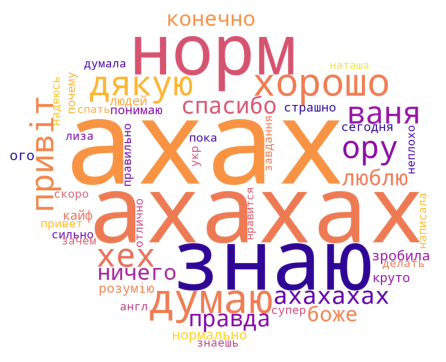

In [255]:
make_wordcloud(split_msg_to_words(my_messages), 50, cloud_mask)

- —É —á–∞—Ç—ñ –∑ –º–æ—î—é –ø–æ–¥—Ä—É–≥–æ—é 

In [197]:
my_messages_to_friend = df[(df.from_id == my_id) &(df.to_id==f'{my_bestfriend_id_short}') & (df.type == 'text')]['message']

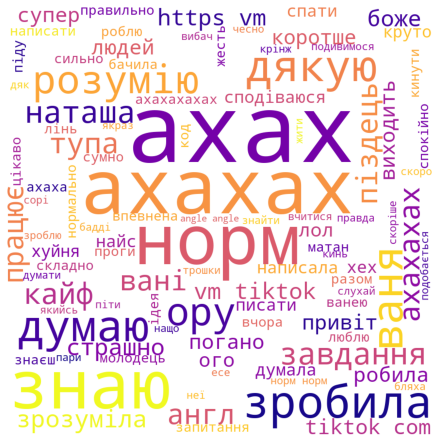

In [198]:
make_wordcloud(split_msg_to_words(my_messages_to_friend),100,heart_mask)

- –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è –≤—ñ–¥ —É—Å—ñ—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤ —É —á–∞—Ç—ñ –ü—Ä–∏–∫–ª–∞–¥–Ω–æ—ó –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏

In [199]:
prymaty_messages = df[(df.dialog_id ==-1001260680685) & (df.type == 'text')]['message']

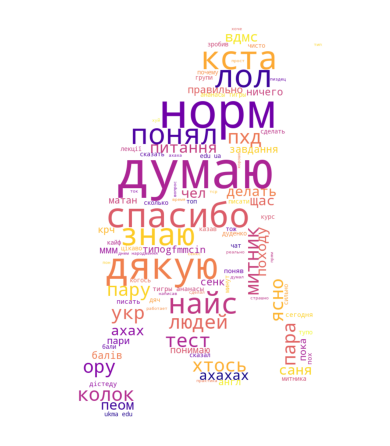

In [200]:
make_wordcloud(split_msg_to_words(prymaty_messages),100, monkey_mask)

–Ø–∫ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏, —è –¥–æ—Å–∏—Ç—å —á–∞—Å—Ç–æ –ø–æ–∑–Ω–∞—á–∞—é –Ω–∞—à—É —Å—Ç–∞—Ä–æ—Å—Ç—É —É —á–∞—Ç—ñ, –≤—ñ—Ç–∞—é –∫–æ–≥–æ—Å—å –∑ –¥–Ω–µ–º –Ω–∞—Ä–æ–¥–∂–µ–Ω–Ω—è, –∞ —Ç–∞–∫–æ–∂ –∞–∫—Ç–∏–≤–Ω–æ –∑–∞–ø–∏—Ç—É–≤–∞–ª–∞/–¥–æ–ø–æ–º–∞–≥–∞–ª–∞ –∑ ER-–¥—ñ–∞–≥—Ä–∞–º–∞–º–∏. –ë–∞–≥–∞—Ç–æ –≥–æ–≤–æ—Ä—é –ø—Ä–æ –Ω–∞–≤—á–∞–Ω–Ω—è —Ç–∞ —Å–∏—Å—Ç–µ–º—É.

In [201]:
# –ø–æ–≤–µ—Ä—Ç–∞—î –Ω–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ —Å–ª–æ–≤–∞ –∑ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —ó—Ö–Ω—å–æ–≥–æ –≤–∂–∏–≤–∞–Ω–Ω—è 
def most_occur(word_list, amount):
    from collections import Counter
    Counter = Counter(word_list)
    return Counter.most_common(amount)

- –ø–∞–ª–µ—Ç–∫–∏ –∫–æ–ª—å–æ—Ä—ñ–≤

In [202]:
color_palette = ['#5c2751', '#5D2D5C', '#603F7C', '#6457A6', 
                  '#8182D3', '#8F97E9', '#8AC9FE', '#76E5FC',
                  "#61D3EB",'#4BC0D9']

# dark blue color palette
dark_blue_palette = ['#042A2B', '#0F3637','#1B4C50', '#316E75', '#48909A',
                  '#53A1AD', '#5EB1BF', '#7AC0CD', '#96CFDB',
                  '#B1DBE4']

# bright colors: from deep purple to green with orange 
bright_palette = ['#8B4E76', '#BD4B73', '#D64971', '#EF476F', '#F4756C',
                  '#FAA369', '#FFD166', '#C1D375', '#83D483',
                  '#06D6A0', '#33DDB1']

blue_pink_palette = ['#C9DDFF', '#D2D2F8', '#D7CDF4', '#DBC7F0', '#E4BCE9', '#ECB0E1', '#E797BE',
                     '#E58AAD', '#E27D9B', '#E0758F', '#DF7189', '#DE6C83', '#D88097', '#D08EA5', 
                     '#C1AAC0', '#C5C4E0', '#C7D1F0']

## 2. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –Ω–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω–∏—Ö –º–Ω–æ—é —ñ –º–æ—î—é –Ω–∞–π–∫—Ä–∞—â–æ—é –ø–æ–¥—Ä—É–≥–æ—é —Å–ª—ñ–≤ —É –Ω–∞—à–æ–º—É –∑ –Ω–µ—é —á–∞—Ç—ñ

In [203]:
import seaborn as sns

In [204]:
natasha_to_me = df_merged[(df_merged.name == 'natasha') & (df_merged.to_id == my_id_short) & (df.type=='text')]['message']
my_messages = df_merged[(df_merged.name == 'natasha') & (df_merged.from_id == my_id) & (df.type=='text')]['message']
natasha_most_occur = most_occur(split_msg_to_words(natasha_to_me), 25)
my_most_occur = most_occur(split_msg_to_words(my_messages),25)

all_natasha_words = split_msg_to_words(natasha_to_me)
all_my_words = split_msg_to_words(my_messages)

all_words = my_most_occur + natasha_most_occur
unique = np.unique(all_words)
unique_words =  [word for word in unique if (not word.isnumeric()) & (not word.isdigit())]

our_words_df = pd.DataFrame({'word':unique_words})

natasha_dict = dict(natasha_most_occur)
my_dict = dict(my_most_occur)

natasha = []
me = []

for word in our_words_df.word:
    natasha.append(all_natasha_words.count(word))
    me.append(all_my_words.count(word))
            
our_words_df['natasha'] = natasha
our_words_df['me'] = me
our_words_df.set_index('word')

natasha   me
word                    
+++             133  150
–∞–Ω–≥–ª            107   87
–∞—Ö–∞—Ö             12  646
–∞—Ö–∞—Ö–∞—Ö          203  401
–∞—Ö–∞—Ö–∞—Ö–∞—Ö        195   89
–≤–∞–Ω—è             43  158
–≤–∞–Ω—ñ             31   83
–¥—É–º–∞–ª–∞          103   62
–¥—É–º–∞—é           213  168
–¥—è–∫—É—é            73  171
–∑–∞–≤–¥–∞–Ω–Ω—è        149  104
–∑–Ω–∞—é            242  287
–∑—Ä–æ–±–∏–ª–∞         223  181
–∑—Ä–æ–∑—É–º—ñ–ª–∞       129   85
–∫–∞–π—Ñ            231   91
–∫–æ–¥             103   41
–∫—Ä—É—Ç–æ           115   58
–ª—é–¥–µ–π           120   73
–Ω–∞–π—Å            156   71
–Ω–∞–ø–µ–≤–Ω–æ         101   13
–Ω–∞—Ç–∞—à–∞            1  112
–Ω–æ—Ä–º            315  397
–Ω–æ—Ä–º–∞–ª—å–Ω–æ       161   49
–æ–≥–æ             131   81
–æ—Ä—É              28  162
–ø—Ä–∞—Ü—é—î          122   80
–ø—ñ–∑–¥–µ—Ü—å           1   92
—Ä–µ–∞–ª—å–Ω–æ         166   20
—Ä–æ–∑—É–º—ñ—é         184  150
—Å–∫–ª–∞–¥–Ω–æ         103   48
—Å–ø–æ–¥—ñ–≤–∞—é—Å—å      112    0
—Å—Ç—Ä–∞—à–Ω–æ          82   80
—Ç—É–ø–∞             47   88
—é–ª—è             175    9

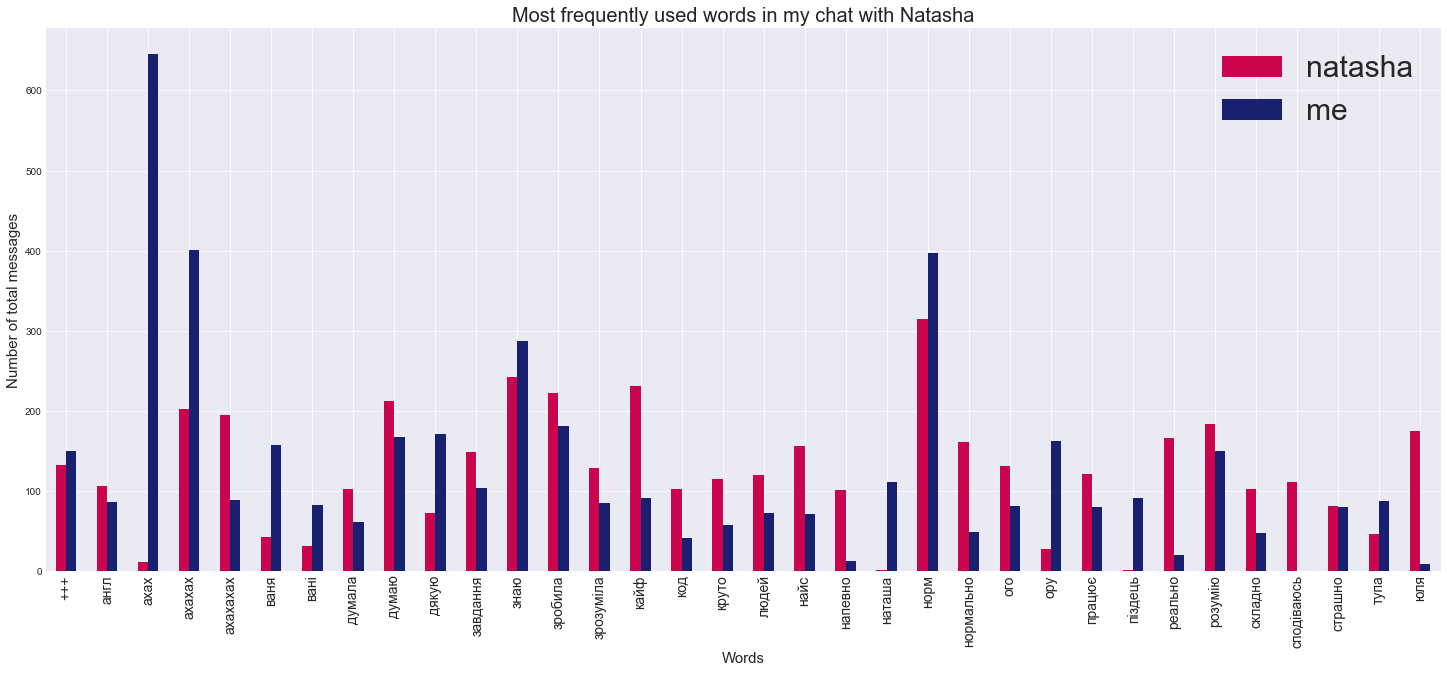

In [236]:
our_words_df.plot(x="word", y=['natasha', 'me'], kind="bar", color=['#CA054D', '#18206F'], fontsize=15)
plt.xlabel('Words', fontsize= 15) 
plt.ylabel('Number of total messages', fontsize= 15)
plt.title('Most frequently used words in my chat with Natasha', fontsize= 20) 
plt.xticks(rotation=90, fontsize= 14)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (25,10)

## 3. –ó–º—ñ–Ω–∞ –Ω–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à–∏—Ö —Å–ª—ñ–≤ –∫–æ–∂–Ω—ñ –ø—ñ–≤—Ä–æ–∫—É –∑ –ø–æ—á–∞—Ç–∫—É 2020

In [206]:
import datetime as dt
from dateutil.relativedelta import relativedelta

In [207]:
df['date.date'] = df['date']
df['date.date'] = pd.to_datetime(df['date.date']).dt.date

In [274]:
# –ø–æ–≤–µ—Ä—Ç–∞—î —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫—ñ–≤ –Ω–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à–∏—Ö —Å–ª—ñ–≤ –∑ —Å—ñ—á–Ω—è 2020 –ø–æ 3 –º—ñ—Å—è—Ü—ñ
most_occur_halfyear = []
max_date = max(df['date.date'])
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

while start < max_date:
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date'] >= start) & (df['date.date']<end)]['message']
    most_occur_halfyear.append(most_occur(split_msg_to_words(my_messages),10))
    start=end
    end=end+relativedelta(months=+1)

In [275]:
# –¥–æ–¥–∞—î–º–æ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–ª–æ–≤–∞ —É —Å–ø–∏—Å–æ–∫ 
unique = np.unique(most_occur_halfyear)
unique_words = [word for word in unique if (not word.isnumeric()) & (not word.isdigit())]
words_occurence_df = pd.DataFrame({'word':unique_words})

In [210]:
columns = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March']

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

for i in range(0,len(columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word))
    words_occurence_df[columns[i]]=values
    start=end
    end=end+relativedelta(months=+1)
words_occurence_df['Total']=words_occurence_df.sum(axis=1, numeric_only=True)

In [211]:
words_occurence_df = words_occurence_df[words_occurence_df['Total'] >= 45]
words_occurence_df.sort_values(by='Total')
words_occurence_df.set_index('word')

2020 Jan  2020 February  2020 March  2020 April  2020 May  2020 June  \
word                                                                            
+++             0              0           0           0         0          0   
-_-             0              0           0           0         0          0   
–∞–Ω–≥–ª            0              0           1           0         0          2   
–∞—Ö–∞—Ö            0              4           5           2         3          1   
–∞—Ö–∞—Ö–∞—Ö          0              1           1           0         0          0   
...           ...            ...         ...         ...       ...        ...   
—É–∫—Ä             0              0           1           0         0          1   
—Ö–µ—Ö             0              0           2           0         2          1   
—Ö–æ—Ä–æ—à–∏–π         2              0           0           0         0          0   
—Ö–æ—Ä–æ—à–æ          0              3          20           1         3          3   
üòÇüòÇüòÇüòÇ            0              2           0           4         1          2   

         2020 July  2020 August  2020 September  2020 October  ...  2021 July  \
word                                                           ...              
+++              1            1               4             2  ...          8   
-_-              0            0               0             0  ...          0   
–∞–Ω–≥–ª             3            0               4             8  ...          0   
–∞—Ö–∞—Ö             1            8              46           189  ...         43   
–∞—Ö–∞—Ö–∞—Ö           2            4              20           135  ...         18   
...            ...          ...             ...           ...  ...        ...   
—É–∫—Ä              3            0               2            22  ...          0   
—Ö–µ—Ö              0            1               6           107  ...          8   
—Ö–æ—Ä–æ—à–∏–π          0            2               0            12  ...          3   
—Ö–æ—Ä–æ—à–æ           5            6              15            84  ...         11   
üòÇüòÇüòÇüòÇ             1            2               6            46  ...          0   

         2021 August  2021 September  2021 October  2021 November  \
word                                                                
+++                8              21            31             17   
-_-                4               1             5              5   
–∞–Ω–≥–ª               0              28             8             10   
–∞—Ö–∞—Ö              88             146            79            143   
–∞—Ö–∞—Ö–∞—Ö            25              26            40             76   
...              ...             ...           ...            ...   
—É–∫—Ä                0               0             2              4   
—Ö–µ—Ö                7              19             8             10   
—Ö–æ—Ä–æ—à–∏–π            1               0             0              2   
—Ö–æ—Ä–æ—à–æ            29              16             5              3   
üòÇüòÇüòÇüòÇ               0               0             0              0   

         2021 December  2022 January  2022 February  2022 March  Total  
word                                                                    
+++                 11            16             21          13    324  
-_-                  5             6              2           3    112  
–∞–Ω–≥–ª                 3            14              3           4    171  
–∞—Ö–∞—Ö               154            91             65          64   1917  
–∞—Ö–∞—Ö–∞—Ö              90            61             87          70   1079  
...                ...           ...            ...         ...    ...  
—É–∫—Ä                  0             2              1          20    163  
—Ö–µ—Ö                 15             8              4           0    434  
—Ö–æ—Ä–æ—à–∏–π              2             1              1           6     62  
—Ö–æ—Ä–æ—à–æ               8          

In [212]:
season_columns = ['0-6 months 2020', '7-12 months 2020',
           '0-6 months 2021', '7-12 months 2021',
           '0-6 months 2022', 'Total']
seasonal_occurence = pd.DataFrame({'word':unique_words})

In [213]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+6)

for i in range(0,len(season_columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word))
    seasonal_occurence[season_columns[i]]=values
    start=end
    end=end+relativedelta(months=+6)
seasonal_occurence['Total']=seasonal_occurence.sum(axis=1, numeric_only=True)

In [214]:
seasonal_occurence

word  0-6 months 2020  7-12 months 2020  0-6 months 2021  \
0      +++                0                14              164   
1      -_-                0                44               37   
2     –∞–Ω–≥–ª                3                52               46   
3     –∞—Ö–∞—Ö               15               728              301   
4   –∞—Ö–∞—Ö–∞—Ö                2               480              104   
..     ...              ...               ...              ...   
91    —á–µ—Ä—Ç                7                23                4   
92   —à–≤–µ–¥—ã                2                 0                0   
93   —à–∫–æ–ª—É                9                10                0   
94    üòÇüòÇüòÇüòÇ                9               102                9   
95     üòÖüòÖüòÖ                7                19               14   

    7-12 months 2021  0-6 months 2022  Total  
0                 96               50    324  
1                 20               13    114  
2                 49               29    179  
3                653              244   1941  
4                275              261   1122  
..               ...              ...    ...  
91                 1                0     35  
92                 0                0      2  
93                 1                2     22  
94                 0                0    120  
95                 2                0     42  

[96 rows x 7 columns]

In [215]:
seasonal_occurence = seasonal_occurence[seasonal_occurence['Total'] >= 45]

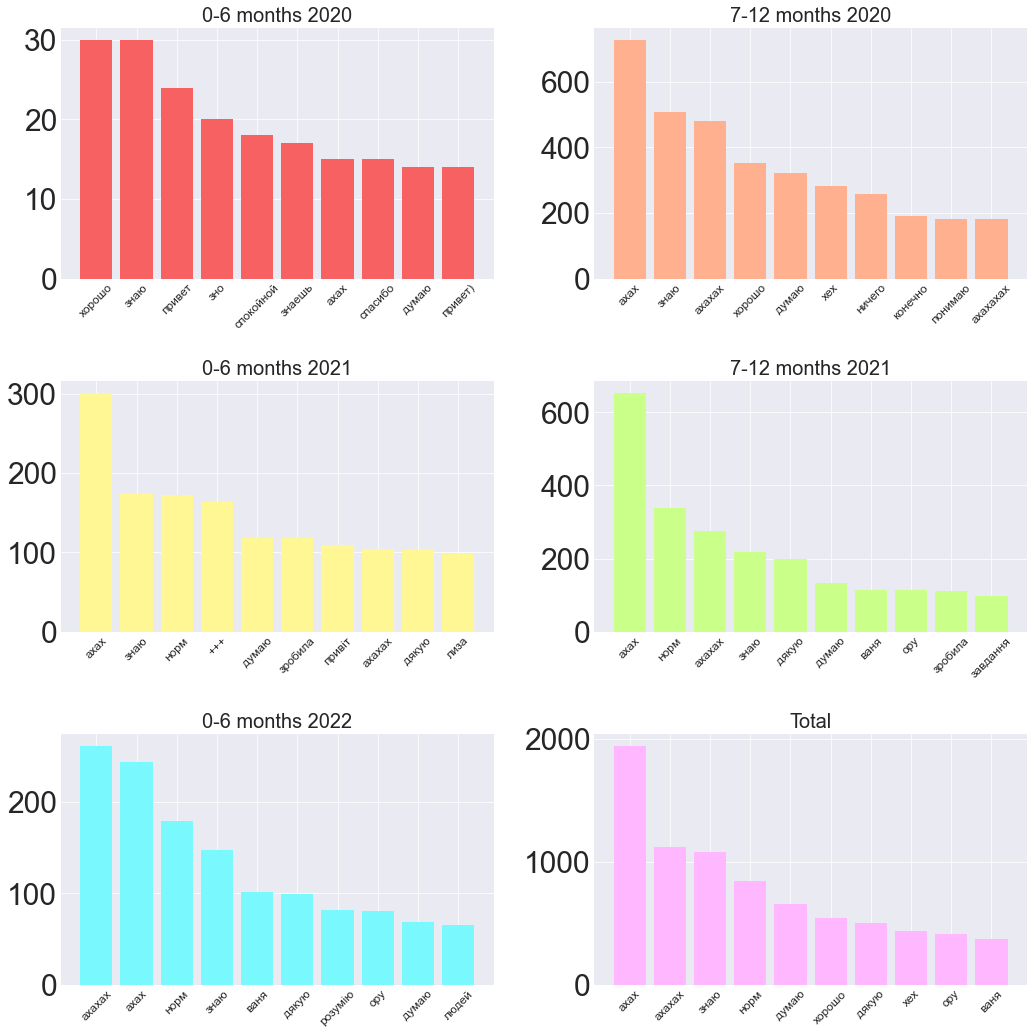

In [259]:
colors = ['#F76161', '#FFB18F', '#FFF694', '#CAFF8A', '#79F9FD', '#FFB7FF']
fig,ax=plt.subplots(3, 2,figsize=(15,15))
num = 0
for column in season_columns:
    top_season_15 = seasonal_occurence.sort_values(by=column, ascending = False).head(10)
    ax[(int(num/2))%3, num%2].bar(top_season_15['word'], top_season_15[season_columns[num]], color=colors[num])
    ax[(int(num/2))%3, num%2].set_title(season_columns[num], fontsize = 20)
    ax[(int(num/2))%3, num%2].set_xticklabels(top_season_15['word'], fontsize=12, rotation=45)
    # ax[(int(num/2))%4, num%2].set_yticklabels(fontsize=12)
    num+=1

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

### 4. –¢–æ–ø 15 –Ω–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à–∏—Ö –º–Ω–æ—é —Å–ª—ñ–≤

Text(0, 0.5, 'amount')

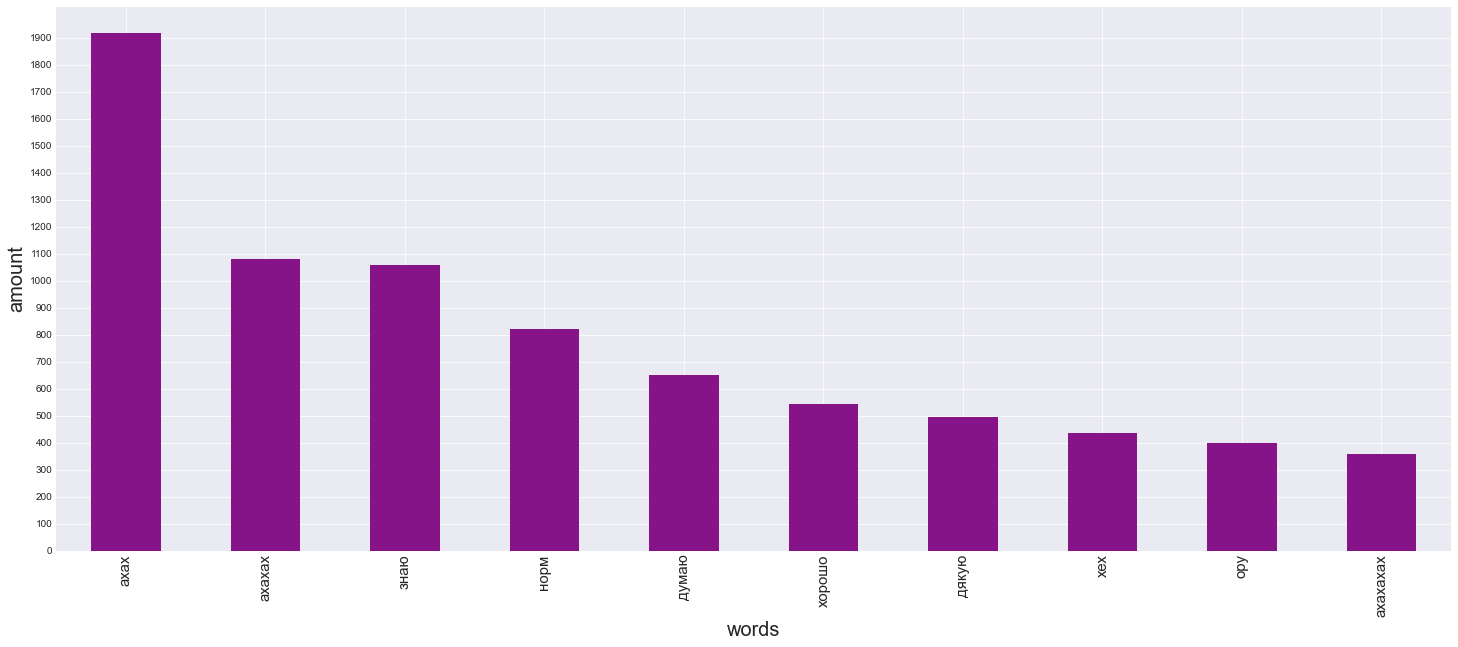

In [261]:
top15 = words_occurence_df.sort_values(by='Total', ascending = False).head(10).set_index('word')
top15['Total'].plot(kind='bar', color = ['#861388'])

plt.yticks(range(0, 2000, 100), fontsize = 10)
plt.xticks(fontsize=15)

plt.xlabel('words', fontsize = 20)
plt.ylabel('amount', fontsize = 20)

### 5. –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–æ—Å—è –≤–∂–∏–≤–∞–Ω–Ω—è —Å–ª—ñ–≤, —â–æ –ø–æ–∑–Ω–∞—á–∞—é—Ç—å —Å–º—ñ—Ö?

In [284]:
words_occurence_df = pd.DataFrame({'word':unique_words})
columns = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March']

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

for i in range(0,len(columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word)/len(all_words))
    words_occurence_df[columns[i]]=values
    start=end
    end=end+relativedelta(months=+1)
    
words_occurence_df['Average']=words_occurence_df.mean(axis=1, numeric_only=True)
words_occurence_df.sort_values(by='Average')
words_occurence_df.set_index('word')

2020 Jan  2020 February  2020 March  2020 April  2020 May  2020 June  \
word                                                                           
+++      0.00000       0.000000    0.000000    0.000000  0.000000   0.000000   
-_-      0.00000       0.000000    0.000000    0.000000  0.000000   0.000000   
–∞–Ω–≥–ª     0.00000       0.000000    0.000769    0.000000  0.000000   0.002801   
–∞—Ö–∞—Ö     0.00000       0.013378    0.003843    0.002451  0.005660   0.001401   
–∞—Ö–∞—Ö–∞—Ö   0.00000       0.003344    0.000769    0.000000  0.000000   0.000000   
...          ...            ...         ...         ...       ...        ...   
—á–µ—Ä—Ç     0.00000       0.000000    0.002306    0.003676  0.000000   0.001401   
—à–≤–µ–¥—ã    0.00905       0.000000    0.000000    0.000000  0.000000   0.000000   
—à–∫–æ–ª—É    0.00000       0.013378    0.002306    0.001225  0.000000   0.001401   
üòÇüòÇüòÇüòÇ     0.00000       0.006689    0.000000    0.004902  0.001887   0.002801   
üòÖüòÖüòÖ      0.00000       0.010033    0.000000    0.000000  0.001887   0.004202   

        2020 July  2020 August  2020 September  2020 October  ...  2021 July  \
word                                                          ...              
+++      0.001073     0.000943        0.000983      0.000102  ...   0.002294   
-_-      0.000000     0.000000        0.000000      0.000000  ...   0.000000   
–∞–Ω–≥–ª     0.003219     0.000000        0.000983      0.000409  ...   0.000000   
–∞—Ö–∞—Ö     0.001073     0.007547        0.011299      0.009651  ...   0.012332   
–∞—Ö–∞—Ö–∞—Ö   0.002146     0.003774        0.004913      0.006894  ...   0.005162   
...           ...          ...             ...           ...  ...        ...   
—á–µ—Ä—Ç     0.001073     0.000000        0.000246      0.000306  ...   0.000000   
—à–≤–µ–¥—ã    0.000000     0.000000        0.000000      0.000000  ...   0.000000   
—à–∫–æ–ª—É    0.000000     0.000000        0.000246      0.000255  ...   0.000000   
üòÇüòÇüòÇüòÇ     0.001073     0.001887        0.001474      0.002349  ...   0.000000   
üòÖüòÖüòÖ      0.001073     0.000000        0.000246      0.000306  ...   0.000000   

        2021 August  2021 September  2021 October  2021 November  \
word                                                               
+++        0.002254        0.002819      0.004434       0.001941   
-_-        0.001127        0.000134      0.000715       0.000571   
–∞–Ω–≥–ª       0.000000        0.003758      0.001144       0.001142   
–∞—Ö–∞—Ö       0.024789        0.019597      0.011299       0.016330   
–∞—Ö–∞—Ö–∞—Ö     0.007042        0.003490      0.005721       0.008679   
...             ...             ...           ...            ...   
—á–µ—Ä—Ç       0.000000        0.000134      0.000000       0.000000   
—à–≤–µ–¥—ã      0.000000        0.000000      0.000000       0.000000   
—à–∫–æ–ª—É      0.000000        0.000000      0.000000       0.000000   
üòÇüòÇüòÇüòÇ       0.000000        0.000000      0.000000       0.000000   
üòÖüòÖüòÖ        0.000000        0.000000      0.000000       0.000228   

        2021 December  2022 January  2022 February  2022 March   Average  
word                                                                      
+++          0.001373      0.002159       0.002426    0.001332  0.002075  
-_-          0.000624      0.000810       0.000231    0.000307  0.000500  
–∞–Ω–≥–ª         0.000375      0.001889       0.000347    0.000410  0.001010  
–∞—Ö–∞—Ö         0.019228      0.012281       0.007510    0.006558  0.009973  
–∞—Ö–∞—Ö–∞—Ö       0.011237      0.008232       0.010052    0.007173  0.004586  
...               ...           ...            ...         ...       ...  
—á–µ—Ä—Ç         0.000000      0.000000       0.000000    0.000000  0.000399  
—à–≤–µ–¥—ã        0.000000      0.000000       0.000000    0.000000  0.000335  
—à–∫–æ–ª—É        0.000125      0.000000       0.000116    0.000000  0.000713  
üòÇüòÇüòÇüòÇ         0.000000      0.

In [299]:
laughters = ['–∞—Ö–∞—Ö','–∞—Ö–∞—Ö–∞—Ö','–∞—Ö–∞—Ö–∞—Ö–∞—Ö', '–æ—Ä—É','—Ö–µ—Ö', 'üòÇüòÇüòÇüòÇ']
laughter_df = words_occurence_df[words_occurence_df['word'].isin(laughters)].sort_values(by='Average', ascending=False).set_index('word')
laughter_df = laughter_df.transpose().drop('Average')
laughter_df['x'] = range(0, 27)

### 5.1 –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–æ—Å—è –≤–∂–∏–≤–∞–Ω–Ω—è –Ω–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à–æ–≥–æ —Å–º—ñ—Ö—É "–∞—Ö–∞—Ö"?

2022-05-07 15:16:29,254 | INFO | category.py:227 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-05-07 15:16:29,264 | INFO | category.py:227 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


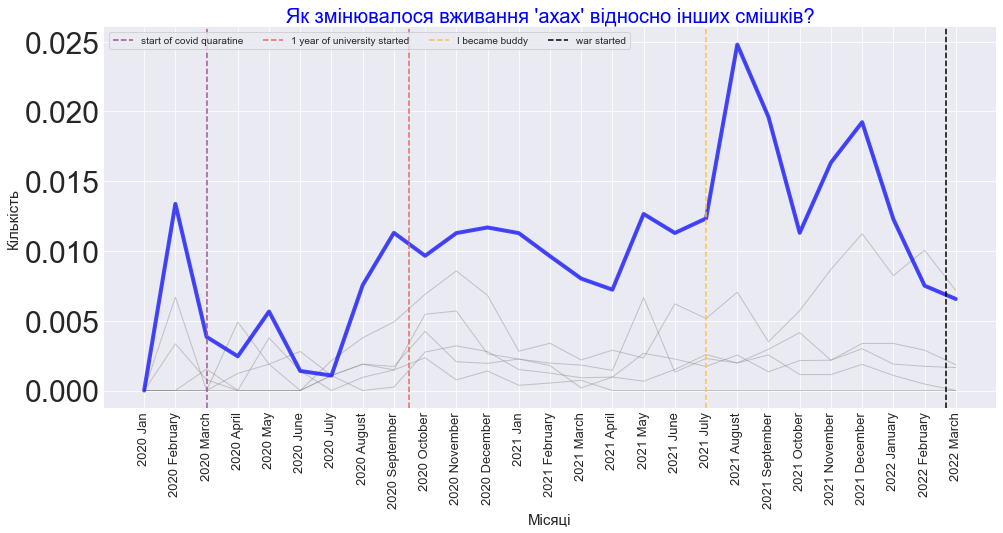

In [307]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (16,7))
# plot multiple lines
for column in laughter_df.drop('x', axis=1):
    plt.plot(laughter_df['x'], laughter_df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(columns, laughter_df['–∞—Ö–∞—Ö'], marker='', color='blue', linewidth=4, alpha=0.7)


# Add titles
plt.title("–Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–æ—Å—è –≤–∂–∏–≤–∞–Ω–Ω—è '–∞—Ö–∞—Ö' –≤—ñ–¥–Ω–æ—Å–Ω–æ —ñ–Ω—à–∏—Ö —Å–º—ñ—à–∫—ñ–≤?", loc='center', fontsize=20, fontweight=0, color='blue')
plt.xticks(rotation = 90, fontsize = 13)
plt.xlabel("–ú—ñ—Å—è—Ü—ñ",  fontsize=15)
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å",  fontsize=15)

plt.axvline(x = 2, linestyle ='--', color = '#A4508B', label = 'start of covid quaratine')
plt.axvline(x = 8.5, linestyle ='--', color = '#ED6A5A', label = '1 year of university started')
plt.axvline(x = 18, linestyle ='--', color = '#FFC145', label = 'I became buddy')
plt.axvline(x = 25.7, linestyle ='--', color = '#000000', label = 'war started')

plt.legend(loc = "upper left", frameon = True, fontsize = 10, ncol=4 )
# Show the graph
plt.show()

### 5.2 –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–æ—Å—è –≤–∂–∏–≤–∞–Ω–Ω—è –∫–æ–∂–Ω–æ–≥–æ —Å–º—ñ—Ö—É —É –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑ —É—Å—ñ–º–∞?

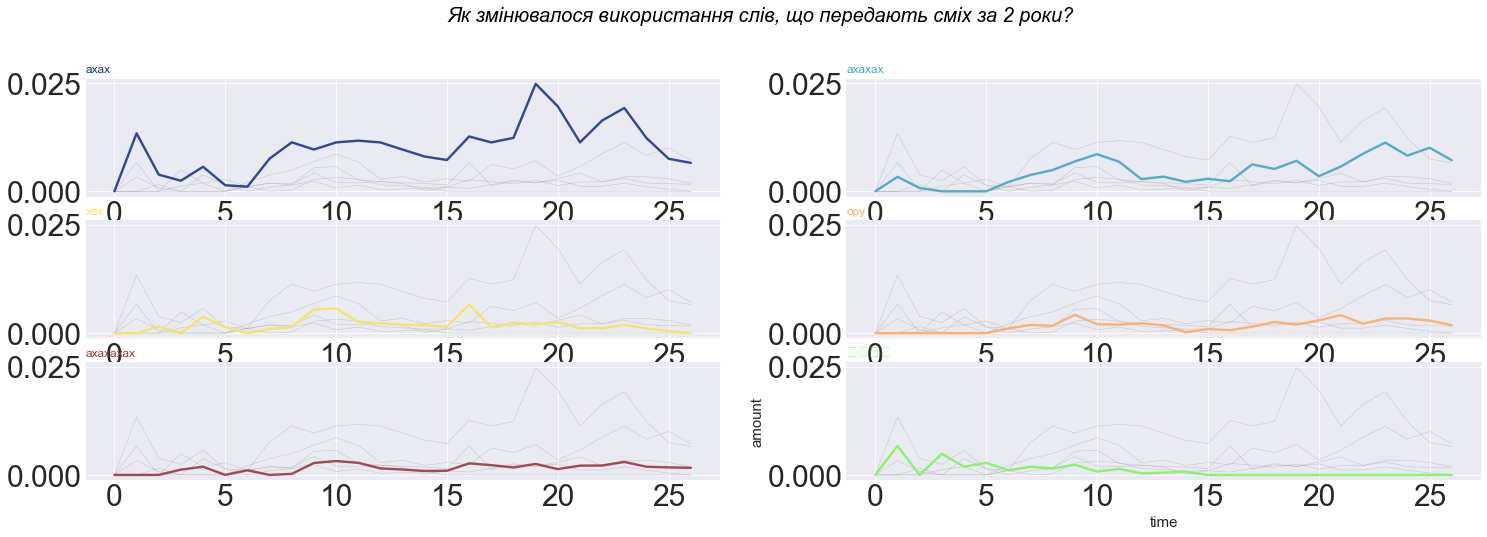

In [295]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = ['#1E3888', '#47A8BD', '#F5E663', '#FFAD69', '#9C3848', '#82F562']
# multiple line plot
num=0
for column in laughter_df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,2, num)
 
    # plot every group, but discrete
    for v in laughter_df.drop('x', axis=1):
        plt.plot(laughter_df['x'], laughter_df[v], marker='', color='grey', linewidth=0.6, alpha=0.3, label=column)
 
    # Plot the lineplot
    plt.plot(laughter_df['x'], laughter_df[column], marker='', color=palette[num-1], linewidth=2.4, alpha=0.9, label=column)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='on')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='on')
    
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette[num-1])
    
# Add title
plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette[num-1] )
plt.xlabel('time', fontsize = 15)
plt.ylabel('amount', fontsize = 15)

# general title
plt.suptitle("–Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–æ—Å—è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è —Å–ª—ñ–≤, —â–æ –ø–µ—Ä–µ–¥–∞—é—Ç—å —Å–º—ñ—Ö –∑–∞ 2 —Ä–æ–∫–∏?", fontsize=20, fontweight=0, color='black', style='italic')
# Show the graph
plt.show()

## 6.1 –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ª—é–¥–µ–π —É —è–∫–∏—Ö –Ω–µ–¥–æ—Å—Ç—É–ø–Ω–∏–π –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω—É( –∑ —É—Å—ñ—Ö –ª—é–¥–µ–π, –∑ —è–∫–∏–º–∏ —è –ø–æ–≤'—è–∑–∞–Ω–∞ —á–µ—Ä–µ–∑ —á–∞—Ç–∏)?

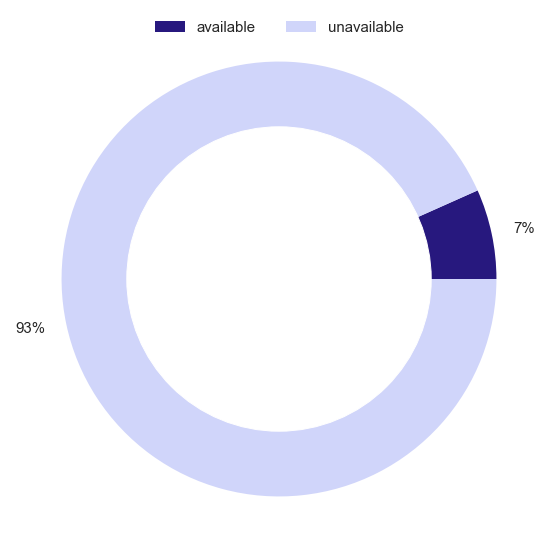

In [222]:
copy_meta = df_meta.copy().drop_duplicates(subset = 'users', keep = 'first').reset_index()
copy_meta
available = 0
unavailable = 0
for user in copy_meta['users']:
    if user[-5:-1] == 'None':
        unavailable+=1
    else:
        available+=1
total = available + unavailable
groups = [available, unavailable]
names = ['available', 'unavailable']
percents = [f'{round(available/total * 100)}%', f'{round(unavailable/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#27187E','#D0D5FA'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="upper center", fontsize=15, ncol=2)
# Show the graph
plt.show()

## 6.2 –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ª—é–¥–µ–π, —É —è–∫–∏—Ö –ø—Ä–∏—Ö–æ–≤–∞–Ω–∏–π –Ω–æ–º–µ—Ä –∑ —Ç–∏—Ö, –∫–æ–º—É —è –ø–∏—Å–∞–ª–∞ –≤ –ø–ø( –ø—Ä–∏–≤–∞—Ç–Ω—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è )?

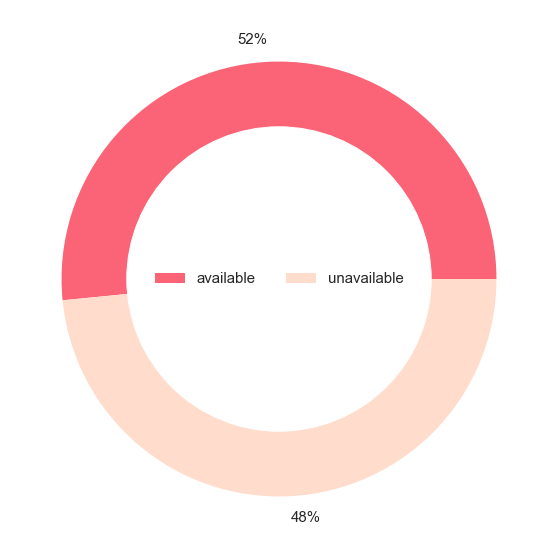

In [223]:
private_chats = df_meta[df_meta.type == 'Private dialog']

available = 0
unavailable = 0
dialogs = []
for dialog in private_chats.dialog_id:
    if df[df.dialog_id == dialog]['message'].count() > 50:
        dialogs.append(dialog)
            
for dialog in dialogs:
    for user in df_meta[df_meta['dialog_id']==dialog]['users']:
        if user[-5:-1] == 'None':
            unavailable+=1
        else:
            available+=1
total = available + unavailable
groups = [available, unavailable]
names = ['available', 'unavailable']
percents = [f'{round(available/total * 100)}%', f'{round(unavailable/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#FB6376', '#FFDCCC'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()           


## 7. –ù–∞–π–±—ñ–ª—å—à –∞–∫—Ç–∏–≤–Ω–∏–π —á–∞—Å –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è –¥–æ–¥–∞—Ç–∫—É –ø—Ä–æ—Ç—è–≥–æ–º –¥–æ–±–∏?
### 7.1 –∑–∞ –≥–æ–¥–∏–Ω–∞–º–∏ 

In [224]:
df['date'] = pd.to_datetime(df['date'])
my_msg = df[(df.from_id == my_id) & (df.type == 'text')]
my_msg['hour'] = my_msg['date'].dt.hour
my_msg['hour'] = [(hour + 2)%24 for hour in my_msg['hour']]

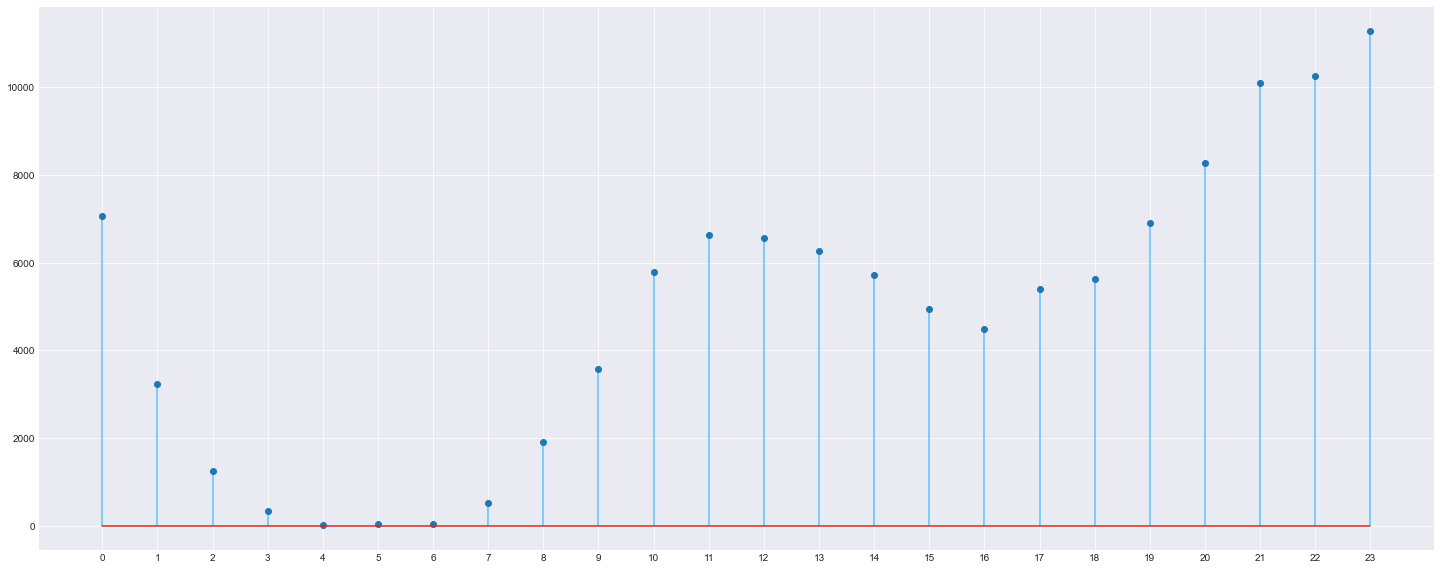

In [225]:
time_amount = my_msg.groupby('hour')['message'].count()
plt.stem(time_amount, linefmt='#55C1FF')
plt.xticks( range(0, 24), fontsize = 10)
plt.show()

Text(0, 0.5, 'Amount')

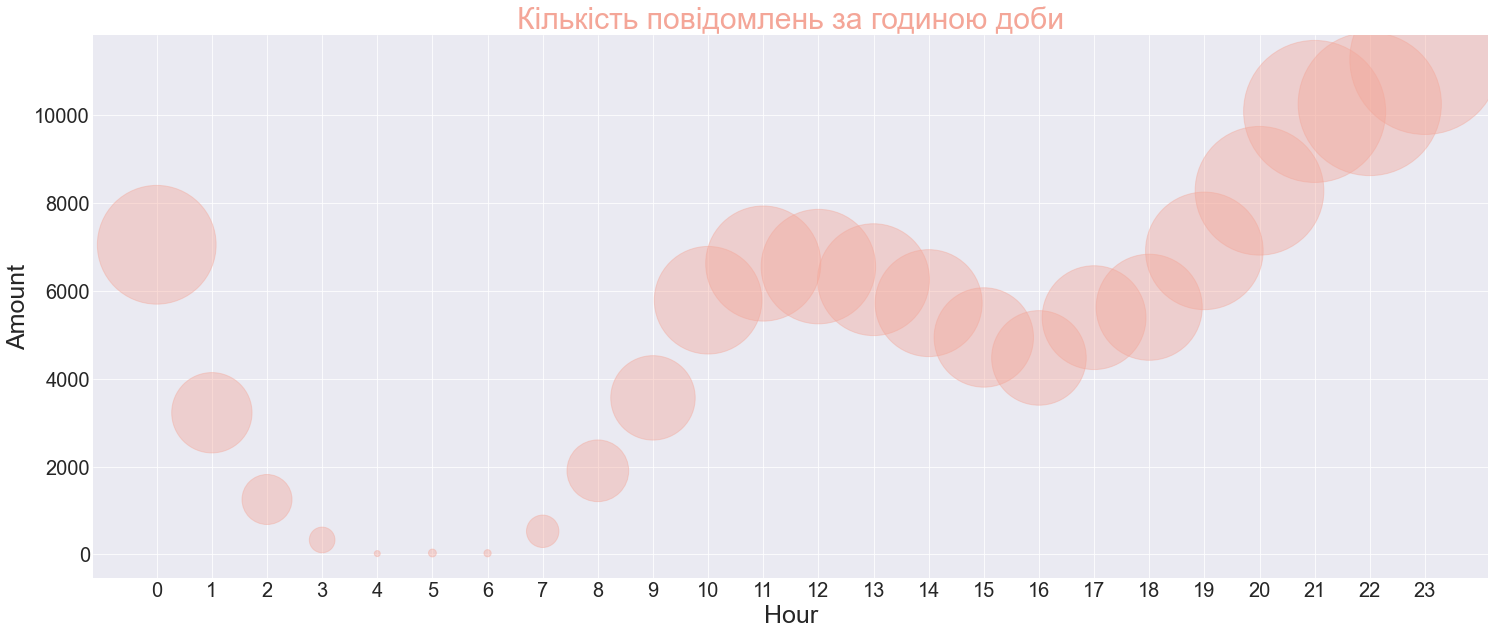

In [226]:
plt.scatter(time_amount.index, time_amount, s=time_amount*2, c="#F4A698", alpha=0.4)
plt.xticks(range(0, 24), fontsize = 20)
plt.yticks(fontsize = 20)
plt.rcParams["figure.figsize"] = (30,15)
plt.title("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –∑–∞ –≥–æ–¥–∏–Ω–æ—é –¥–æ–±–∏", loc='center', fontsize=30, fontweight=0, color='#F4A698')
plt.xlabel('Hour', fontsize = 25)
plt.ylabel('Amount', fontsize = 25)

### 7.2 –∑–∞ –ø—Ä–æ–º—ñ–∂–∫–∞–º–∏ —É 6 –≥–æ–¥–∏–Ω

In [227]:
time_intervals_amount = [time_amount[i*6: i*6+6].sum() for i in range(0,4)]

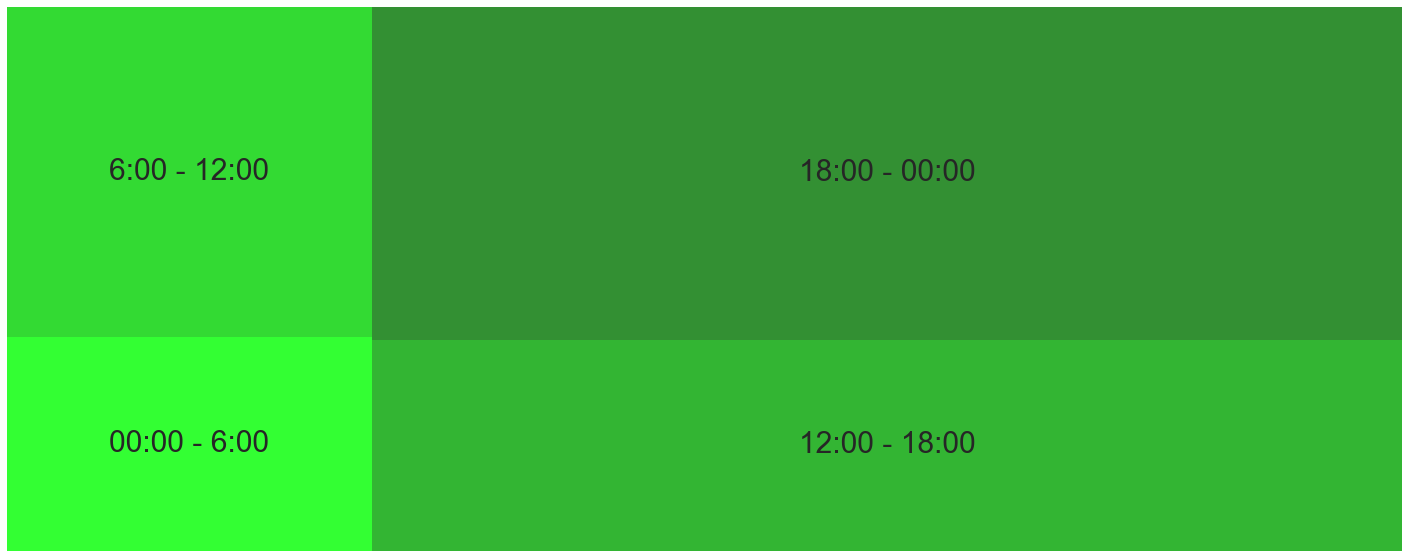

In [308]:
import squarify

squarify.plot(sizes=time_intervals_amount, alpha=.8, color=[ '#00FF00', '#00D100', '#00A300', '#007500'],  label=["00:00 - 6:00", "6:00 - 12:00", "12:00 - 18:00", "18:00 - 00:00"])
plt.rc('font', size=30)   
plt.axis('off')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

## 8. –ü–æ–º—ñ—Å—è—á–Ω—ñ –∑–º—ñ–Ω–∏ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –ø—Ä–æ—Ç—è–≥–æ–º 2-–æ—Ö —Ä–æ–∫—ñ–≤ —ñ –∫–æ—Ä–µ–ª—è—Ü—ñ—è —Ü–∏—Ö –∑–º—ñ–Ω –∑ –ø–æ–¥—ñ—è–º–∏ –≤ –º–æ—î–º—É –∂–∏—Ç—ñ

In [229]:
max_date = max(my_msg['date.date'])
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

monthly_amount = []
while start < max_date:
    my_messages = my_msg[(my_msg.from_id == my_id) & (my_msg.type == 'text') & (my_msg['date.date'] >= start) & (my_msg['date.date']<end)]['message'].count()
    monthly_amount.append(my_messages)
    start=end
    end=end+relativedelta(months=+1)

In [230]:
bars = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March', '2022 April']

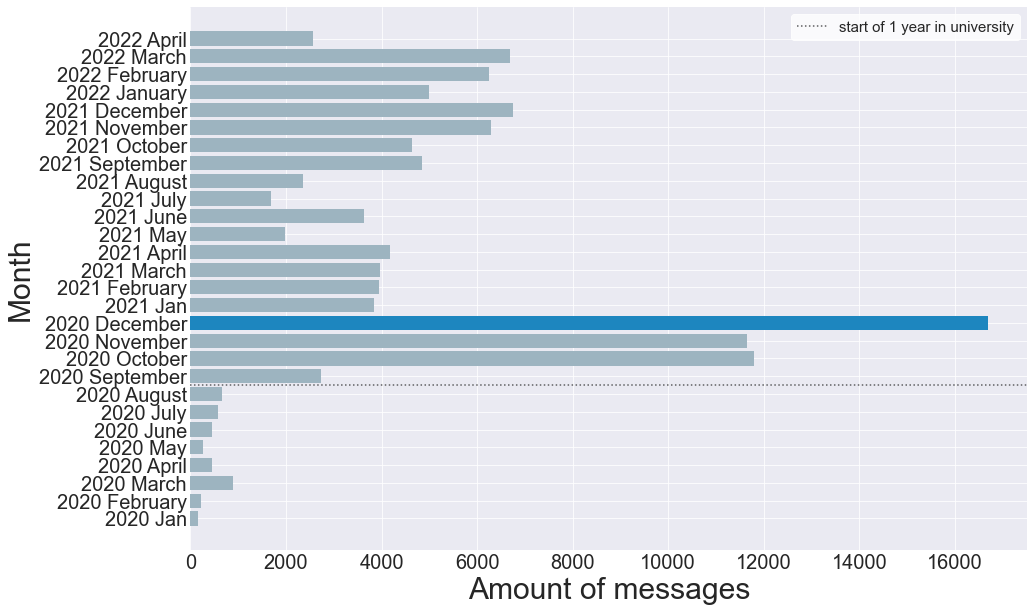

In [312]:
palette = ['#9DB4C0']
palette = ["#9DB4C0" if i != 11 else "#1D86BF" for i in range(0,28)]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
fig,ax = plt.subplots(figsize = (15,10))

plt.barh(y_pos, monthly_amount, color=palette)
# Create names on the x-axis
plt.yticks(y_pos, bars, fontsize=20)
plt.xticks(range(0, 18000, 2000), fontsize = 20)
plt.axhline(y = 7.5, color = '#5D5E60', linestyle = ':', label = "start of 1 year in university")
plt.xlabel('Amount of messages')
plt.ylabel('Month')
plt.rcParams["figure.figsize"] = (10,10)
# Show graphic
legend = plt.legend(loc="upper right", ncol = 1, frameon = 1, fontsize=15)
frame = legend.get_frame()
frame.set_color('white')
plt.show()

- –Ø–∫ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏ –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É, –≤ –æ—Å—Ç–∞–Ω–Ω—î –ø—ñ–≤—Ä—ñ—á—á—è –º–æ–≥–æ –Ω–∞–≤—á–∞–Ω–Ω—è —É —à–∫–æ–ª—ñ, –∫–æ–ª–∏ —Å–∞–º–µ –ø–æ—á–∞–≤—Å—è –∫–æ–≤—ñ–¥ —ñ –∫–∞—Ä–∞–Ω—Ç–∏–Ω–∏, —è —Å–ø—ñ–ª–∫—É–≤–∞–ª–∞—Å—è –¥—É–∂–µ –º–∞–ª–æ( —Ö–æ—á–∞ –≥—Ä–∞—Ñ—ñ–∫ —Ç–∞ –∞–Ω–∞–ª—ñ–∑ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –Ω–∞—Å—Ç—ñ–ª—å–∫–∏ –¥–∞–≤–Ω–æ —É —á–∞—Å—ñ –ø–æ—Ç—Ä–µ–±—É–≤–∞–≤ –±–∏ —ñ–Ω—à–æ–≥–æ —Å–∫–∞—á—É–≤–∞–Ω–Ω—è –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –∑ –±—ñ–ª—å—à–æ—é —ó—Ö –∫—ñ–ª—å–∫—ñ—Å—Ç—é).
- –ù–∞ –≥—Ä–∞—Ñ—ñ–∫—É –ø–æ–º—ñ—Ç–Ω–æ, —â–æ –ø—ñ—Å–ª—è –º–æ–≥–æ –≤—Å—Ç—É–ø—É –≤ –ú–æ–≥–∏–ª—è–Ω–∫—É —É –≤–µ—Ä–µ—Å–Ω—ñ 2020 –≤—ñ–¥–±—É–≤—Å—è —Ä—ñ–∑–∫–∏–π —Å–∫–∞—á–æ–∫ –∫-–∫–æ—Å—Ç—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –≤—ñ–¥ –º–µ–Ω–µ 
- –¢–∞–∫–æ–∂ –≤–∏–¥–Ω–æ –Ω–µ–≤–µ–ª–∏–∫–∏–π —Å–∫–∞—á–æ–∫, –ø—ñ—Å–ª—è –ø–æ—á–∞—Ç–∫—É –≤—ñ–π–Ω–∏, –∞–¥–∂–µ –Ω–∞–≤—ñ—Ç—å –ª—é–¥–∏, –∑ —è–∫–∏–º–∏ –º–∏ –º–∞–ª–æ —Å–ø—ñ–ª–∫—É–≤–∞–ª–∏—Å—è, –Ω–∞–ø–∏—Å–∞–ª–∏ —ñ –∑–∞–ø–∏—Ç–∞–ª–∏, —á–∏ –≤—Å–µ —É –º–µ–Ω–µ –≤–ø–æ—Ä—è–¥–∫—É
- –¢–∞–∫–æ–∂ –º–æ–∂–Ω–∞ –ø–æ–º—ñ—Ç–∏—Ç–∏, —â–æ –ø–µ—Ä—ñ–æ–¥–∏ –∑–∏–º–æ–≤–∏—Ö —Ç–∞ –ª—ñ—Ç–Ω—ñ—Ö –∫–∞–Ω—ñ–∫—É–ª –º–∞—é—Ç—å –º–µ–Ω—à–µ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å, –∞–Ω—ñ–∂ —Ç—ñ, —è–∫—ñ –±—É–ª–∏ –¥–æ –Ω–∏—Ö

## 9. –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–Ω–æ—é —ñ –º–æ—ó–º–∏ –±–ª–∏–∑—å–∫–∏–º–∏ –¥—Ä—É–∑—è–º–∏ –µ–º–æ–¥–∑—ñ —Ç–∞ —Å—Ç—ñ–∫–µ—Ä–∏

In [328]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [329]:
natasha_emoji_list = split_count(" ".join(split_msg_to_words(df[(df.from_id==my_bestfriend_id) & (df.type=='text')]['message'])))
my_emoji_list = split_count(" ".join(split_msg_to_words(df[(df.from_id==my_id) & (df.type=='text')]['message'])))
prymaty_emoji_list = split_count(" ".join(split_msg_to_words(prymaty_messages)))

In [330]:
from collections import Counter
natasha_emoji = Counter(natasha_emoji_list).most_common(10)
my_emoji = Counter(my_emoji_list).most_common(10)
prymaty_emoji = Counter(prymaty_emoji_list).most_common(10)
emoji_df = pd.DataFrame(my_emoji)
emoji_df

0     1
0      ‚ù§  6883
1      üòÇ  1396
2      üòÖ   748
3      üò≠   267
4  ü§∑üèª‚Äç‚ôÄÔ∏è   218
5      üóø   188
6     ‚ù§Ô∏è   188
7      ü§°   176
8      üòë   174
9      üëç   112

### 9.1 –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ—à—ñ –º–Ω–æ—é –µ–º–æ–¥–∑—ñ

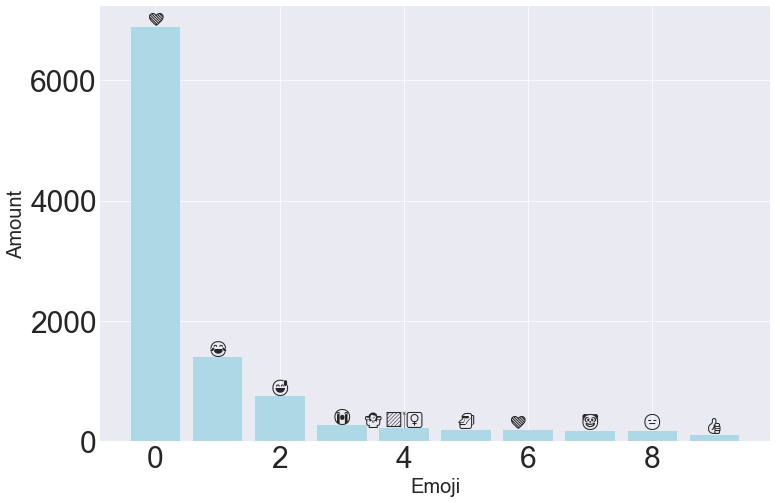

In [331]:
labels =emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

### 9.2 –ù–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–æ—î—é –ø–æ–¥—Ä—É–≥–æ—é –ù–∞—Ç–∞—à–µ—é –µ–º–æ–¥–∑—ñ 

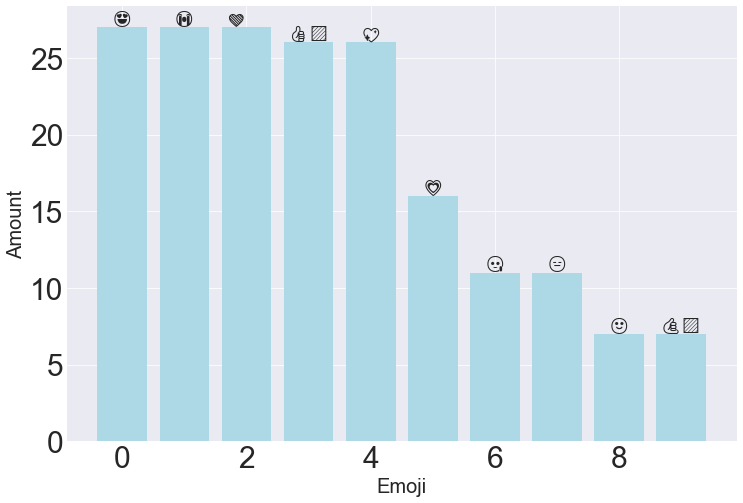

In [332]:
emoji_df = pd.DataFrame(natasha_emoji)
labels = emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

### 9.3 –ù–∞–π–≤–∂–∏–≤–∞–Ω—ñ—à—ñ –µ–º–æ–¥–∑—ñ —É —á–∞—Ç—ñ –ü—Ä–∏–∫–ª–∞–¥–Ω–æ—ó –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏( –≤—ñ–¥ —É—Å—ñ—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤ )

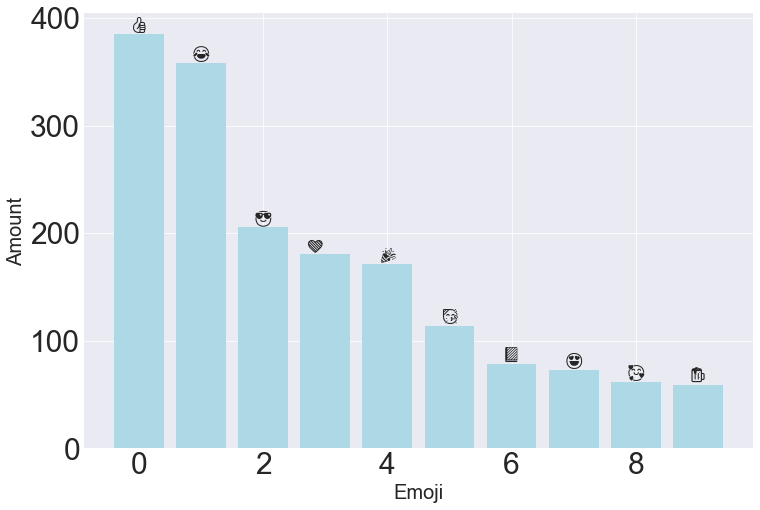

In [333]:
emoji_df = pd.DataFrame(prymaty_emoji)
labels = emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

–Ø–∫ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏, —Ç—É—Ç –¥–æ—Å–∏—Ç—å –ø–æ—à–∏—Ä–µ–Ω–∏–º —î –µ–º–æ–¥–∑—ñ –∑ –≤—ñ—Ç–∞–Ω–Ω—è–º–∏( –∞–¥–∂–µ –º–∏ –≤—ñ—Ç–∞—î–º–æ –æ–¥–∏–Ω –æ–¥–Ω–æ–≥–æ –∑ –¥–Ω—è–º–∏ –Ω–∞—Ä–æ–¥–∂–µ–Ω–Ω—è )

## 10. –õ—é–¥–∏, —è–∫—ñ —á–∞—Å—Ç—ñ—à–µ –ø–∏—à—É—Ç—å –ø–µ—Ä—à–∏–º–∏ –º–µ–Ω—ñ, –∞ –Ω–µ —è —ó–º

### 10.1 –Ø–∫ —á–∞—Å—Ç–æ —è –ø–∏—à—É –ø–µ—Ä—à–æ—é –ù–∞—Ç–∞—à—ñ?

In [334]:
# messages from my chat with natasha
our_chat = df[(df.dialog_id==544639169)]
our_chat['hour'] = our_chat['date'].dt.hour

me = 0
natasha = 0

for date in our_chat['date.date'].unique():
    today = our_chat[(our_chat['date.date']==date) &(our_chat['hour']>3) ]
    if today['message'].count()>0:
        today_first = today[(today['date']==min(today['date']))]
        from_id = today_first.iloc[0]['from_id']
        if from_id=='PeerUser(user_id=342667961)':
            me+=1
        elif str(from_id)=='nan':
            natasha+=1

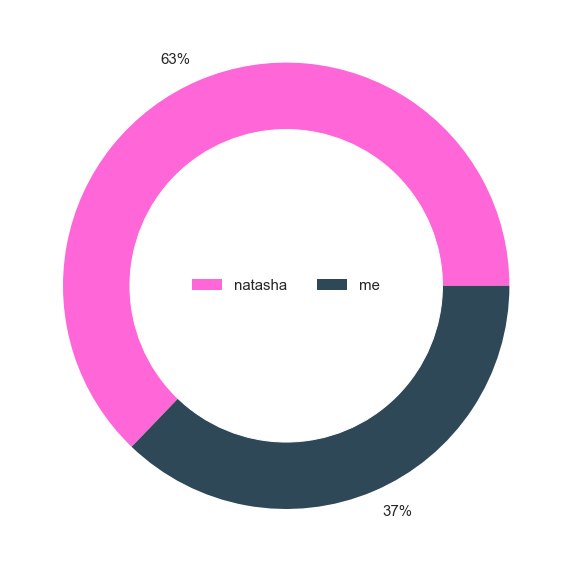

In [335]:
total = natasha + me
groups = [natasha, me]
names = ['natasha', 'me']
percents = [f'{round(natasha/total * 100)}%', f'{round(me/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#FF66D8', '#2F4858'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### 10.2 –°–∫—ñ–ª—å–∫–∏ –ª—é–¥–µ–π, –∑ —è–∫–∏–º–∏ –º–∏ –º–∞—î–º–æ –ø—Ä–∏–≤–∞—Ç–Ω—ñ —á–∞—Ç–∏ —ñ –ª–∏—Å—Ç—É–≤–∞–ª–∏—Å—è –±—ñ–ª—å—à–µ 10 —Ä—ñ–∑–Ω–∏—Ö –¥–Ω—ñ–≤, –ø–∏—Å–∞–ª–æ –Ω–∞–π—á–∞—Å—Ç—ñ—à–µ –ø–µ—Ä—à–∏–º–∏ –º–µ–Ω—ñ, —Å–∫—ñ–ª—å–∫–æ–º —è –ø–∏—Å–∞–ª–∞ –ø–µ—Ä—à–æ—é –Ω–∞–π—á–∞—Å—Ç—ñ—à–µ —Ç–∞ –∑—ñ —Å–∫—ñ–ª—å–∫–æ–º–∞ –ª—é–¥—å–º–∏ —Ü—ñ —Ü–∏—Ñ—Ä–∏ –≤—ñ–¥–Ω–æ—Å–Ω–æ –æ–¥–Ω–∞–∫–æ–≤—ñ?

In [336]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date.date'] = df_merged['date'].dt.date
df_merged['hour'] = df_merged['date'].dt.hour

In [337]:
dialog_ids = df_meta[df_meta['type']=='Private dialog']['dialog_id'].unique()

In [338]:
name = []
first = []
me_first = []

for dialog in dialog_ids:
    chat = df_merged[df_merged['dialog_id']==dialog]
    me = 0
    not_me = 0
    for date in chat['date.date'].unique():
        today = chat[(chat['date.date']==date) &(chat['hour']>3) ]
        if today['message'].count()>0:
            today_first = today[(today['date']==min(today['date']))]
            from_id = today_first.iloc[0]['from_id']
            if dialog==1419351245:
                if from_id == 'PeerUser(user_id=1419351245)':
                    not_me+=1
                elif str(from_id)=='nan':
                    me+=1
            else:
                if from_id=='PeerUser(user_id=342667961)':
                    me+=1
                elif str(from_id)=='nan':
                    not_me+=1
    first.append(not_me)
    me_first.append(me)
    name.append("".join(chat['name'].unique()))

In [339]:
writes_first_df = pd.DataFrame({'name':name, 'writes_first':first, 'i_write_first':me_first})
writes_first_df['total_days'] = writes_first_df['writes_first'] + writes_first_df['i_write_first']
writes_first_df = writes_first_df.sort_values(by='total_days', ascending=False)

# —Ç–µ–ø–µ—Ä –ø—Ä–∏–±–∏—Ä–∞—î–º–æ —á–∞—Ç–∏ –∑ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –¥–Ω—ñ–≤ —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—è –º–µ–Ω—à–æ—é —Ö–æ—á–∞ –± 10
writes_first_df = writes_first_df[writes_first_df['total_days']>=10]
writes_first_df = writes_first_df[writes_first_df.name.isin(['KMAScheduler', 'Yulia Verbik']) == False]
# writes_first_df = writes_first_df.drop('Yulia Verbik')
writes_first_df

name  writes_first  i_write_first  total_days
107                    natasha           240            142         382
74                      –õ–∏–∑–∞ üçï           143             69         212
8                         –í–∞–Ω—è            84            111         195
52                     Darynka            57             90         147
92                         –ê–Ω—è            52             49         101
78                    –ê–Ω–¥—Ä—ñ–π–∫–æ            63             22          85
79                         –Ø—Å—è            14             59          73
31              Dmytro Novykov            32             29          61
44               –ù–∞—Å—Ç—è –§—ñ–ª–µ–Ω–∫–æ            31             22          53
114                      –ú–∞–∫—Å)            20             31          51
12            –î—ñ–º–∞ –í–µ—Ä–±—ñ–≤—Å—å–∫–∏–π            44              7          51
108            –Ø—Ä–æ—Å–ª–∞–≤ –®–µ–ª–µ–º–µ–π            24             24          48
111                   –ê–ª–µ–∫—Å–µ–π1            26             14          40
88                      –ë–∞–≥–ª–µ–π            18             21          39
127                       –®–µ–≤–∞            15             21          36
70                      Andrew            22             11          33
29                        –°–∫–æ–ø            24              4          28
23                         –Æ—Ä–∞            17             11          28
68          Danyliuk Yevheniia            22              2          24
60                 Stas Boguta            13             10          23
1                        hanna            13              6          19
95                         A–Ω—è             6             12          18
105                 –∞nastasiia            10              6          16
112      –ê–Ω–∞—Å—Ç–∞—Å–∏—è –ö—Ä–∂–µ—à–µ–≤—Å–∫–∞—è             7              9          16
19            –í–∞–ª–µ–Ω—Ç–∏–π –Ø—Ä–æ—Å–ª–∞–≤            12              3          15
36                    –ê–Ω–¥—Ä—ñ–π–∫–æ             7              8          15
9                     —É–ª—è —Å–∫–∞—Ä             8              5          13
106                       –ì–æ—à–∞             5              8          13
43   –†—É—Å—Å–∫—ñ–π –∫–æ—Ä–∞–±–ª—å –Ü–¥–∏ –Ω–∞—Ö—É–π             5              8          13
32                Liza Andrych             2             10          12
59                    –ö–∞—Ä—Ç–æ—à–∫–∞             8              4          12
109                       –ö–∞—Ç—è             5              7          12
86                  Kate Korol            11              1          12
94                    –ë–æ–≥–¥–∞–Ω –ì             6              4          10

In [340]:
from matplotlib_venn import venn2
writes_me_first = writes_first_df[writes_first_df['writes_first']/writes_first_df['total_days'] >= 0.55]
i_write_first = writes_first_df[writes_first_df['i_write_first']/writes_first_df['total_days'] >= 0.55]
equally = writes_first_df[(writes_first_df['writes_first']/writes_first_df['total_days'] < 0.55 ) & (writes_first_df['writes_first']/writes_first_df['total_days'] > 0.45 )]

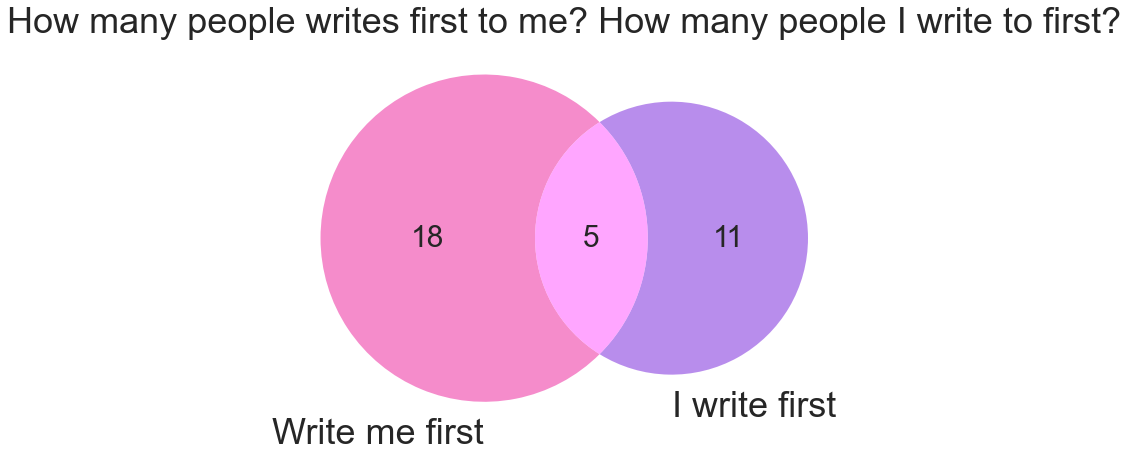

In [341]:
venn2(subsets = (writes_me_first['total_days'].count(), i_write_first['total_days'].count(),equally['total_days'].count()),
      set_labels = ('Write me first', 'I write first'),
      set_colors=("#F15BB5", "#9B5DE5"),alpha=0.7)
plt.title('How many people writes first to me? How many people I write to first?')
plt.show()

### 10.3 –Ø–∫ –≤—ñ–¥—Ä—ñ–∑–Ω—è—î—Ç—å—Å—è –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ä–∞–∑—ñ–≤, –∫–æ–ª–∏ —è –ø–∏—Å–∞–ª–∞ –ø–µ—Ä—à–æ—é, —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ä–∞–∑—ñ–≤, –∫–æ–ª–∏ –º–µ–Ω—ñ –ø–∏—Å–∞–ª–∏ –ø–µ—Ä—à–∏–º–∏, –∑ 15 –ª—é–¥—å–º–∏, –∑ —è–∫–∏–º–∏ —è –ª–∏—Å—Ç—É–≤–∞–ª–∞—Å—è –Ω–∞–π–±—ñ–ª—å—à—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ä—ñ–∑–Ω–∏—Ö –¥–Ω—ñ–≤?

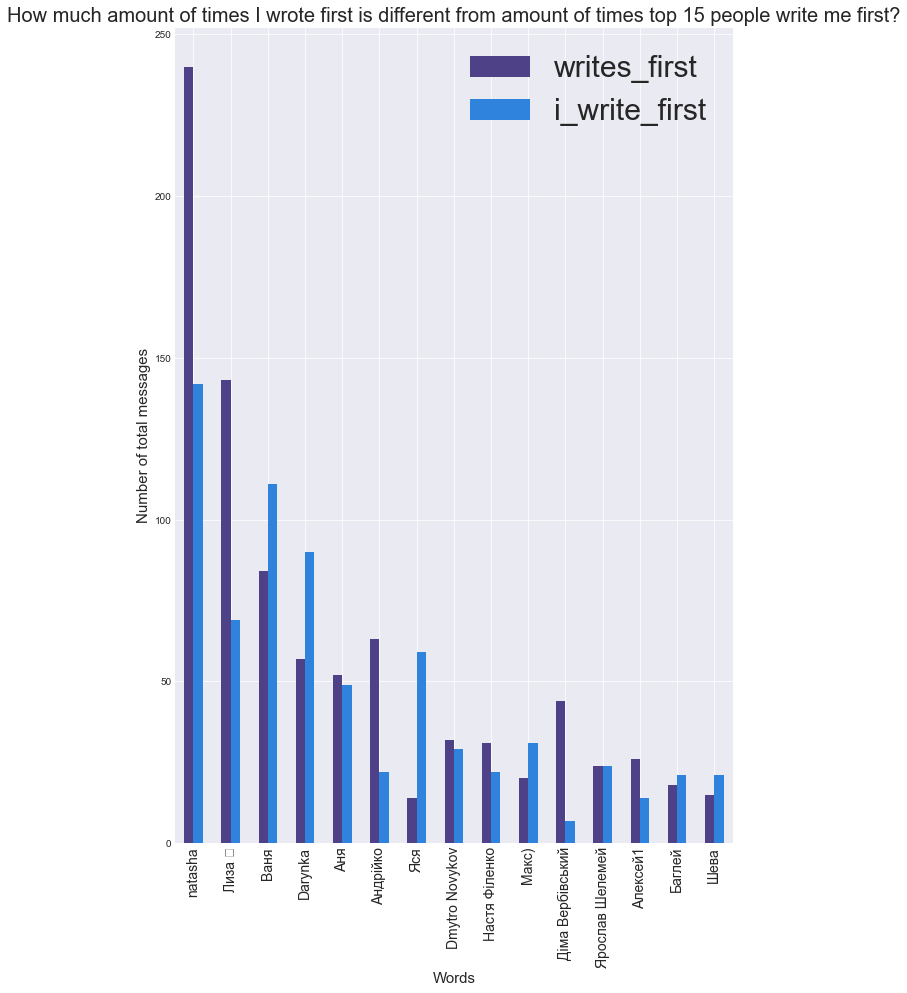

In [342]:
writes_first_df.sort_values(by='total_days', ascending=False).head(15).plot(x='name', y=['writes_first', 'i_write_first'], kind="bar", color=['#4E4187', '#3083DC'], fontsize=15)
plt.xlabel('Words', fontsize= 15) 
plt.ylabel('Number of total messages', fontsize= 15)
plt.title('How much amount of times I wrote first is different from amount of times top 15 people write me first?', fontsize= 20) 
plt.xticks(rotation=90, fontsize= 14)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (10,15)

## 11. –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–ª–∏—Å—è –ª—é–¥–∏ –∑ —è–∫–∏–º–∏ —è –Ω–∞–π–±—ñ–ª—å—à–µ —Å–ø—ñ–ª–∫—É–≤–∞–ª–∞—Å—è? –ø–æ –ø—ñ–≤—Ä–æ–∫—É

In [343]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+6)

top_people = []
while start<max(df_merged['date.date']):
    private_chats = df_merged[(df_merged['type_dialog']=='Private dialog') & (df_merged['date.date']>= start) & (df_merged['date.date']<end)]
    top10 = private_chats.groupby(["name"])["message"].count().sort_values(ascending = False).head(5)
    top_people.append(top10)
    start += relativedelta(months=+6)
    end+= relativedelta(months=+6)

In [344]:
seasons = ['0-6 months 2020', '7-12 months 2020',
           '0-6 months 2021', '7-12 months 2021',
           '0-6 months 2022', 'total', '0']
private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')]
top10 = private_chats.groupby(["name"])["message"].count().sort_values(ascending = False).head(5)
top_people.append(top10)
top_people[1]

name
–ê–Ω–¥—Ä—ñ–π–∫–æ    37342
–õ–∏–∑–∞ üçï      13947
Darynka      3161
–Æ—Ä–∞          1338
–ú–∞–∫—Å)        1300
Name: message, dtype: int64

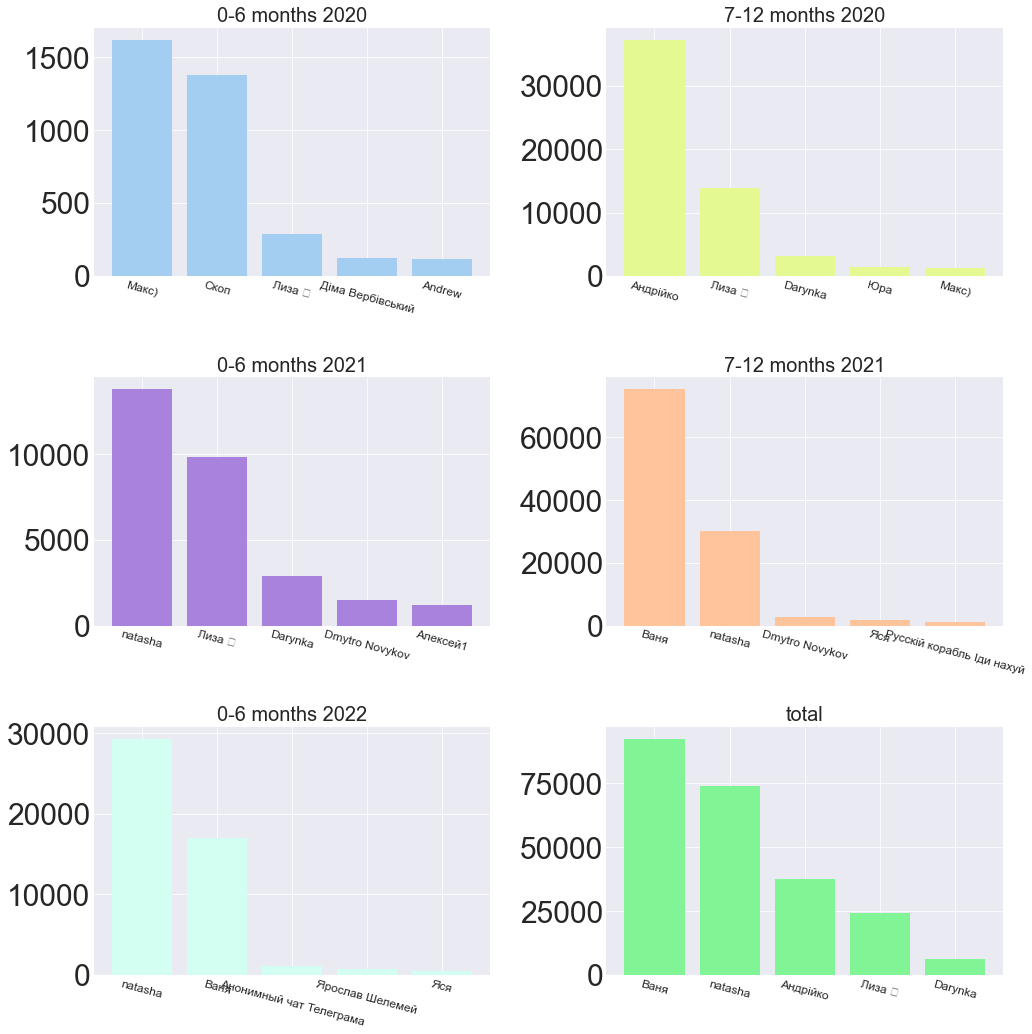

In [345]:
colors = ['#A3CEF1', '#E5F993', '#A882DD', '#FFC49B', '#D3FFF3', '#81F495']
fig,ax=plt.subplots(3, 2,figsize=(15,15))
num = 0
for data in top_people:
    top10 = pd.DataFrame({'name':list(data.keys()), 'amount':data})
    ax[(int(num/2))%3, num%2].bar(top10['name'], top10['amount'], color=colors[num])
    ax[(int(num/2))%3, num%2].set_title(seasons[num], fontsize = 20)
    ax[(int(num/2))%3, num%2].set_xticklabels(top10['name'], fontsize=12, rotation=345)
    # ax[(int(num/2))%4, num%2].set_yticklabels(fontsize=12)
    num+=1
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

–í–ª–∞—Å–Ω–µ –æ—Ç –º–æ—î –æ—Å–æ–±–∏—Å—Ç–µ —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—è —ñ —î, –∫–æ–ª–∏ –∞–Ω–æ–Ω—ñ–º–Ω–∏–π —á–∞—Ç, –≤ —è–∫–æ–º—É —è —Ç—Ä–æ–ª–∏–ª–∞ —Ä—É—Å–Ω—é –æ–¥–∏–Ω –≤–µ—á—ñ—Ä –∑–∞–π–º–∞—î 3 –º—ñ—Å—Ü–µ...

## –ó–∞–ø–∏—Ç–∞–Ω–Ω—è –ø–æ–≤'—è–∑–∞–Ω—ñ –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º —Ä—ñ–∑–Ω–∏—Ö –º–æ–≤

In [346]:
import spacy_fastlang
import spacy

In [347]:
df_lang = pd.read_csv('D:/Naukma/DS/Hw/df_lang')

### 12. 3 –Ω–∞–π–±—ñ–ª—å—à –≤–∂–∏–≤–∞–Ω—ñ –º–æ–≤–∏ —É –¥—ñ–∞–ª–æ–≥–∞—Ö —Ç–∞ —ó—Ö–Ω—î —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω–Ω—è
### a. —É—Å—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è, —É—Å—ñ—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤

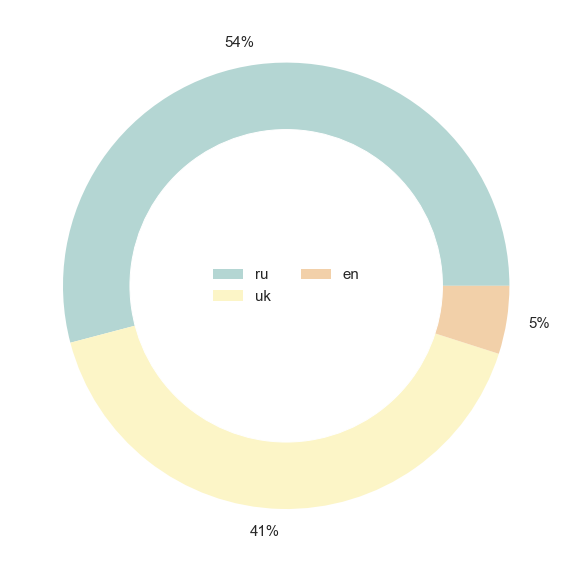

In [348]:
uk = df_lang.groupby(["lang"])["message"].count().sort_values(ascending = False).head(3)
total = uk.sum()
percentage = [f'{round((uk[0]/total)*100)}%', f'{round((uk[1]/total)*100)}%', f'{round((uk[2]/total)*100)}%']
plt.pie(uk, labels=percentage, colors=['#B4D6D3', '#FCF5C7', '#F2D0A9'],  textprops={'fontsize': 15})
p = plt.gcf()
my_circle = plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.legend(list(uk.keys()), loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### b. –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è –≤—ñ–¥ –º–µ–Ω–µ

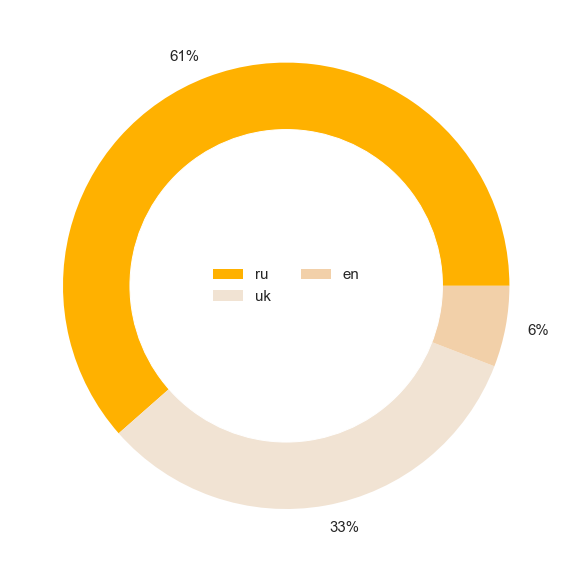

In [349]:
uk = df_lang[df_lang['from_id']==my_id].groupby(["lang"])["message"].count().sort_values(ascending = False).head(3)
total = uk.sum()
percentage = [f'{round((uk[0]/total)*100)}%', f'{round((uk[1]/total)*100)}%', f'{round((uk[2]/total)*100)}%']
plt.pie(uk, labels=percentage, colors=['#FFB100', '#F1E3D3', '#F2D0A9'],  textprops={'fontsize': 15})
p = plt.gcf()
my_circle = plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.legend(list(uk.keys()), loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### 13. –†–æ–∑–ø–æ–¥—ñ–ª–µ–Ω–Ω—è –º–æ–≤ —É –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è—Ö 5 –ª—é–¥–µ–π, –∑ —è–∫–∏–º–∏ —è –Ω–∞–π–±—ñ–ª—å—à–µ —Å–ø—ñ–ª–∫—É—é—Å—è

In [350]:
def get_name(dialog):
    return df_meta[df_meta['dialog_id']==dialog]['name'].values[0]

In [351]:
top_private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')].groupby(["dialog_id"])["message"].count().sort_values(ascending = False).head(5)
top5_people = df_lang.loc[(df_lang['dialog_id'].isin(top_private_chats.keys())) & (df_lang['from_id'] != 'PeerUser(user_id=342667961)')]
top5_people = top5_people[(top5_people['dialog_id']!=1419351245)|(~top5_people['from_id'].isnull())]
    
ru = top5_people[top5_people['lang']=='ru'].groupby('dialog_id')['message'].count()
uk = top5_people[top5_people['lang']=='uk'].groupby('dialog_id')['message'].count()
names = []
for dialog in uk.keys():
    names.append(get_name(dialog))
    
language_use_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})
language_use_df = language_use_df.set_index('name')

In [352]:
language_use_df['total']=language_use_df['ru'] + language_use_df['uk']
df_new = pd.DataFrame()
df_new['uk'] = round((language_use_df['uk']/language_use_df['total'])*100)
df_new['ru'] = round((language_use_df['ru']/language_use_df['total'])*100)

In [353]:
del language_use_df['total']

- –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å 

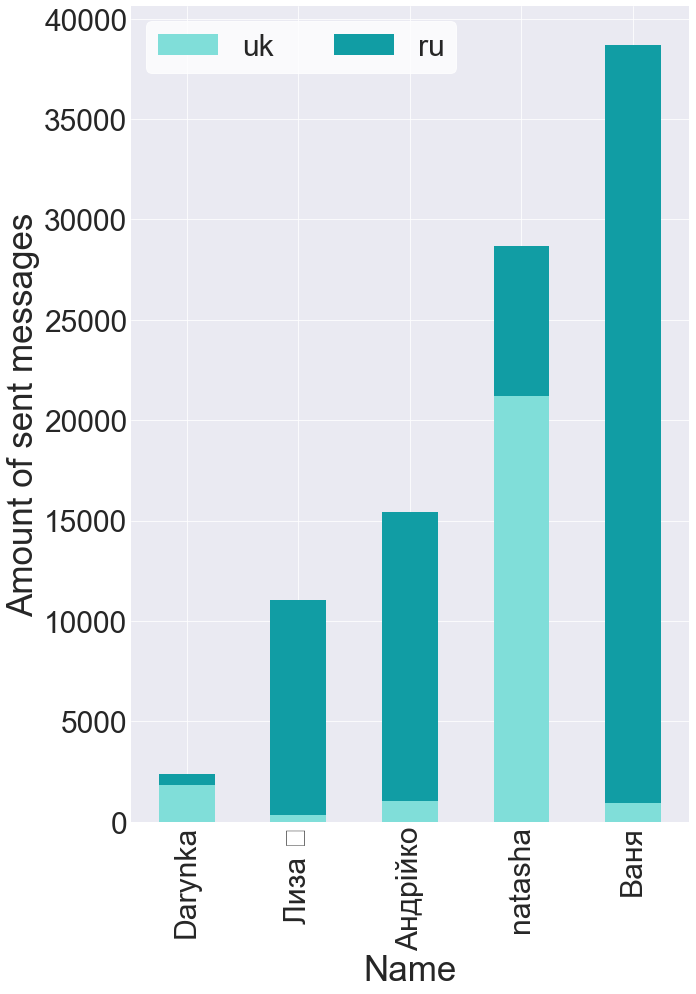

In [354]:
language_use_df.plot(kind='bar', stacked=True, color=['#80DED9', '#119DA4'])
plt.xlabel('Name', fontsize=35)
plt.ylabel('Amount of sent messages', fontsize = 35)
legend = plt.legend(loc="upper left", ncol = 2, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

- –≤—ñ–¥—Å–æ—Ç–æ–∫ –≤–∂–∏–≤–∞–Ω–æ—Å—Ç—ñ

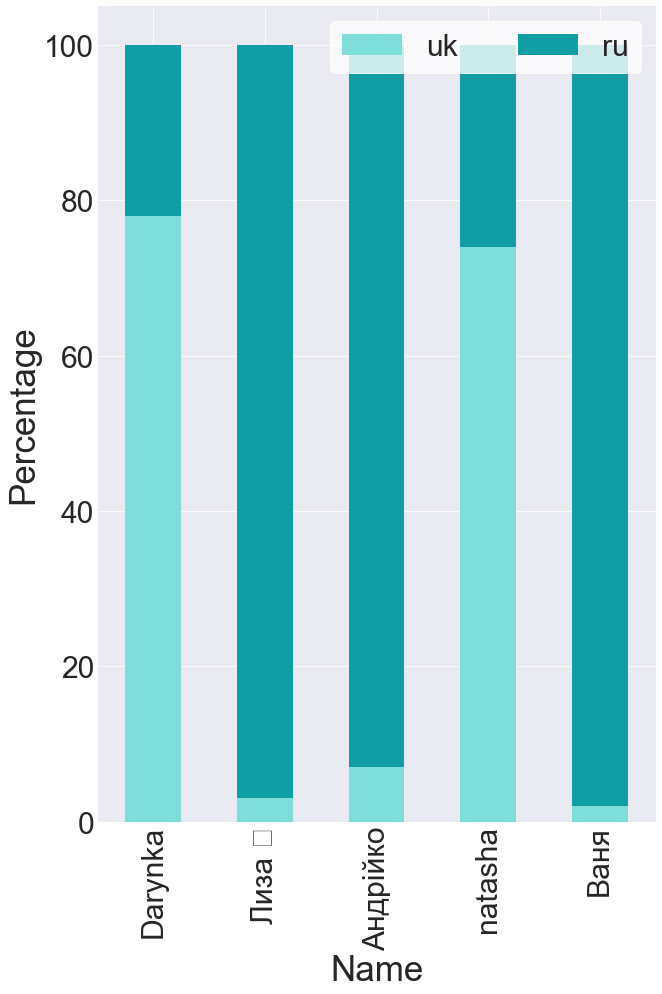

In [355]:
df_new.plot(kind='bar', stacked = True, color=['#80DED9', '#119DA4'])
plt.xlabel('Name', fontsize=35)
plt.ylabel('Percentage', fontsize = 35)
legend = plt.legend(loc="upper right", ncol = 2, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

### 14. –ö—ñ–ª—å–∫—ñ—Å—Ç—å –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤, —É —è–∫–∏—Ö –¥–æ–º—ñ–Ω—É—î —Ä–æ—Å—ñ–π—Å—å–∫–∞ –∞–±–æ —É–∫—Ä–∞—ó–Ω—Å—å–∫–∞ –º–æ–≤–∞ —É —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—ñ

- –ø—Ä–∏–≤–∞—Ç–Ω—ñ —á–∞—Ç–∏

In [356]:
top_private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')].groupby(["dialog_id"])["message"].count().sort_values(ascending = False)
people_lang = df_lang.loc[(df_lang['dialog_id'].isin(top_private_chats.keys())) & (df_lang['from_id'] != 'PeerUser(user_id=342667961)')]
people_lang = people_lang[(people_lang['dialog_id']!=1419351245)|(~people_lang['from_id'].isnull())]
    
names = []
ru = []
uk = []

for dialog in people_lang['dialog_id'].unique():
    names.append(get_name(dialog))
    ru.append(df_lang[(df_lang['dialog_id']==dialog) & (df_lang['lang']=='ru')]['message'].count())
    uk.append(df_lang[(df_lang['dialog_id']==dialog) & (df_lang['lang']=='uk')]['message'].count())
    
people_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})

In [357]:
people_lang_df['total']=people_lang_df['uk'] + people_lang_df['ru']

In [358]:
mostly_ukrainian = people_lang_df[people_lang_df['uk']/people_lang_df['total'] >= 0.65]
mostly_russian = people_lang_df[people_lang_df['ru']/people_lang_df['total'] >= 0.65]
equally = people_lang_df[(people_lang_df['uk']/people_lang_df['total'] < 0.55 ) & (people_lang_df['uk']/people_lang_df['total'] > 0.45 )]

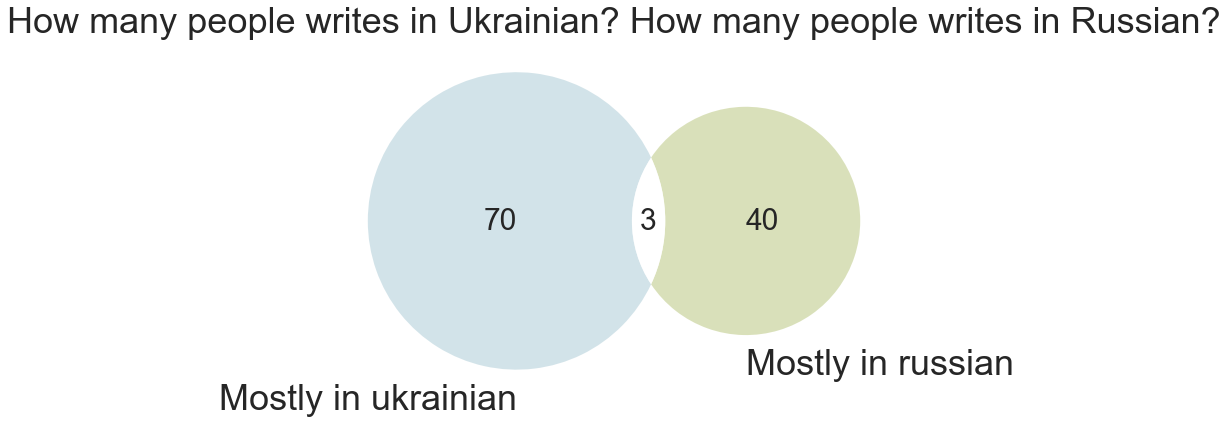

In [359]:
venn2(subsets = (mostly_ukrainian['total'].count(), mostly_russian['total'].count(),equally['total'].count()),
      set_labels = ('Mostly in ukrainian', 'Mostly in russian'),
      set_colors=( "#C0D8E0", "#CAD49D"),alpha=0.7)
plt.title('How many people writes in Ukrainian? How many people writes in Russian?')
plt.show()

- —É—Å—ñ –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫–∏

In [360]:
names = []
ru = []
uk = []

for from_id in df_lang['from_id'].unique():
    if from_id!='nan' and from_id!='PeerUser(user_id=1419351245)':
        names.append(from_id)
        ru.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='ru')]['message'].count())
        uk.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='uk')]['message'].count())
    
people_chats_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})

In [361]:
people_chats_lang_df=pd.read_csv('D:/Naukma/DS/Hw/people_chats_lang_df')
people_chats_lang_df['total'] = people_chats_lang_df['uk'] + people_chats_lang_df['ru']

In [362]:
mostly_ukrainian = people_chats_lang_df[people_chats_lang_df['uk']/people_chats_lang_df['total'] >= 0.65]
mostly_russian = people_chats_lang_df[people_chats_lang_df['ru']/people_chats_lang_df['total'] >= 0.65]
equally = people_chats_lang_df[(people_chats_lang_df['uk']/people_chats_lang_df['total'] < 0.55 ) & (people_chats_lang_df['uk']/people_chats_lang_df['total'] > 0.45 )]

In [363]:
mostly_ukrainian = mostly_ukrainian['name'].count()
mostly_russian = mostly_russian['name'].count()
equally = equally['name'].count()

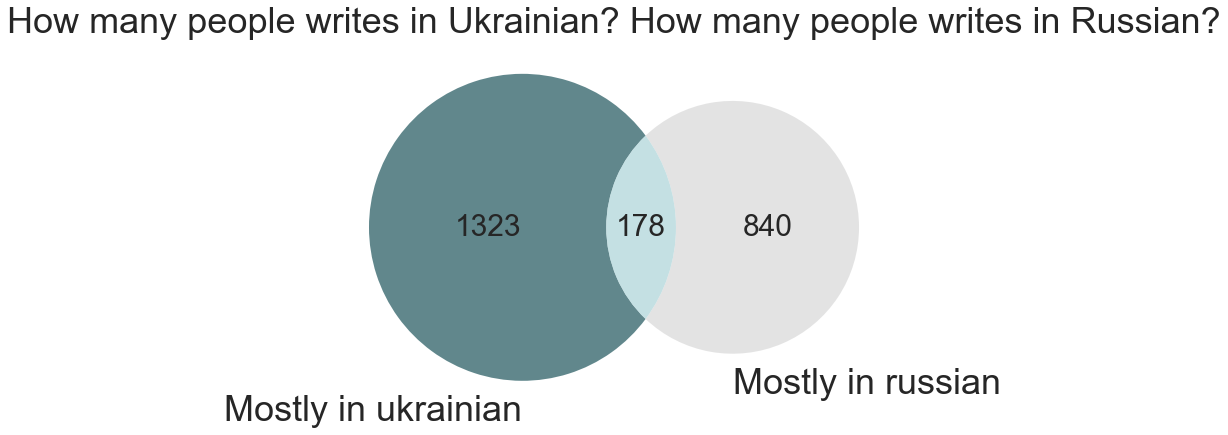

In [364]:
venn2(subsets = (mostly_ukrainian, mostly_russian, equally),
      set_labels = ('Mostly in ukrainian', 'Mostly in russian'),
      set_colors=( "#1E555C", "#D8D8D8"),alpha=0.7)
plt.title('How many people writes in Ukrainian? How many people writes in Russian?')
plt.show()

### 15. –Ø–∫ –∑–º—ñ–Ω—é–≤–∞–≤—Å—è –≤—ñ–¥—Å–æ—Ç–æ–∫ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é –∑–∞ –º—ñ—Å—è—Ü—è–º–∏?

#### 15.1 –º–æ—ó –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è 

In [365]:
df_lang['date.date'] = pd.to_datetime(df_lang['date.date']).dt.date

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    my_lang = df_lang[(df_lang.from_id == my_id) & (df_lang['date.date'] >= start) & (df_lang['date.date']<end)]
    ru.append(my_lang[my_lang['lang']=='ru']['message'].count())
    uk.append(my_lang[my_lang['lang']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [156]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

ru    uk  total  ru_percentage  uk_percentage
columns                                                         
2020 Jan          102    42    144           71.0           29.0
2020 February     181    24    205           88.0           12.0
2020 March        757    57    814           93.0            7.0
2020 April        362    41    403           90.0           10.0
2020 May          213    15    228           93.0            7.0
2020 June         371    34    405           92.0            8.0
2020 July         450    72    522           86.0           14.0
2020 August       556    49    605           92.0            8.0
2020 September   1718   763   2481           69.0           31.0
2020 October     9302  1046  10348           90.0           10.0
2020 November    8957  1389  10346           87.0           13.0
2020 December   13327  1250  14577           91.0            9.0
2021 Jan         2801   459   3260           86.0           14.0
2021 February    2259  1131   3390           67.0           33.0
2021 March       2186  1161   3347           65.0           35.0
2021 April       1284  2147   3431           37.0           63.0
2021 May          816   834   1650           49.0           51.0
2021 June        1409  1626   3035           46.0           54.0
2021 July        1089   387   1476           74.0           26.0
2021 August      1626   405   2031           80.0           20.0
2021 September   1941  2099   4040           48.0           52.0
2021 October     1311  2361   3672           36.0           64.0
2021 November    1882  3208   5090           37.0           63.0
2021 December    2451  3037   5488           45.0           55.0
2022 January     1654  2385   4039           41.0           59.0
2022 February    2012  3155   5167           39.0           61.0
2022 March       2168  3569   5737           38.0           62.0
2022 April        717  1403   2120           34.0           66.0

–ù–∞ –º–æ—é –¥—É–º–∫—É, –¥–∞–Ω–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –º–æ–≤ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—å–æ –¥–æ–±—Ä–µ –≤–ø–æ—Ä–∞–≤—Å—è –∑—ñ —Å–≤–æ—ó–º –∑–∞–≤–¥–∞–Ω–Ω—è–º, –∞–¥–∂–µ –≤—ñ–¥—Å–æ—Ç–∫–∏ –º–∞–ª–∏ –± –≤–∏–π—Ç–∏ —Ç—Ä–æ—Ö–∏ —ñ–Ω—à—ñ( —è –Ω–µ –ª–∏—Å—Ç—É–≤–∞–ª–∞—Å—è —Ä–æ—Å—ñ–π—Å—å–∫–æ—é –≤—ñ–¥ –ø–æ—á–∞—Ç–∫—É –≤—ñ–π–Ω–∏). –¢–æ–º—É —è –≤–∏—Ä—ñ—à–∏–ª–∞ –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏, —è–∫ —Å–ø—Ä–∞—Ü—é–≤–∞–≤ —ñ–Ω—à–∏–π –∑ lang_detect

In [157]:
langue_df = pd.read_csv("D:/Naukma/DS/Hw/langue_df")
langue_df['date.date'] = pd.to_datetime(langue_df['date.date']).dt.date

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    month = langue_df[(langue_df.from_id == my_id) & (langue_df['date.date'] >= start) & (langue_df['date.date']<end)]
    ru.append(month[month['langue']=='ru']['message'].count())
    uk.append(month[month['langue']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [160]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

ru    uk  total  ru_percentage  uk_percentage
columns                                                         
2020 Jan           68    52    120           57.0           43.0
2020 February     127    46    173           73.0           27.0
2020 March        587   105    692           85.0           15.0
2020 April        294    54    348           84.0           16.0
2020 May          175    21    196           89.0           11.0
2020 June         295    63    358           82.0           18.0
2020 July         338   117    455           74.0           26.0
2020 August       419    92    511           82.0           18.0
2020 September   1258   867   2125           59.0           41.0
2020 October     7658  1681   9339           82.0           18.0
2020 November    7112  2158   9270           77.0           23.0
2020 December   10208  2347  12555           81.0           19.0
2021 Jan         2044   681   2725           75.0           25.0
2021 February    1544  1237   2781           56.0           44.0
2021 March       1507  1288   2795           54.0           46.0
2021 April        792  2115   2907           27.0           73.0
2021 May          534   842   1376           39.0           61.0
2021 June        1062  1576   2638           40.0           60.0
2021 July         830   421   1251           66.0           34.0
2021 August      1230   526   1756           70.0           30.0
2021 September   1346  2187   3533           38.0           62.0
2021 October      908  2378   3286           28.0           72.0
2021 November    1258  3282   4540           28.0           72.0
2021 December    1745  3183   4928           35.0           65.0
2022 January     1261  2448   3709           34.0           66.0
2022 February    1382  3282   4664           30.0           70.0
2022 March       1535  3622   5157           30.0           70.0
2022 April        493  1427   1920           26.0           74.0

–¶–µ–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –º–æ–≤ —Ç–∞–∫–æ–∂ –ø—Ä–∞—Ü—é—î –Ω–µ –Ω–∞ –Ω–∞–π–≤–∏—â–æ–º—É —Ä—ñ–≤–Ω—ñ, –∫–æ–ª–∏ —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫—É—î —Ä–æ—Å—ñ–π—Å—å–∫—É —ñ —É–∫—Ä–∞—ó–Ω—Å—å–∫—É –º–æ–≤–∏, —è–∫ –±–∞—á–∏–º–æ. –û–¥–Ω—ñ—î—é –∑ –ø—Ä–∏—á–∏–Ω, —á–æ–º—É —è –≤–∏—Ä—ñ—à–∏–ª–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –º–æ–≤ spacy_fastlang, –±—É–ª–æ —Ç–µ, —â–æ lang_detect —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫—É–≤–∞–≤ –∑-–ø–æ–º—ñ–∂ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É –¥–∞—Ç–∞—Å–µ—Ç—ñ 76 —Ç–∏—Å—è—á –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –±–æ–ª–≥–∞—Ä—Å—å–∫–æ—éüòê, —Ç–æ–±—Ç–æ –º–æ–≤–æ—é, —è–∫–æ—é —è –Ω—ñ–∫–æ–ª–∏ –Ω–µ –ª–∏—Å—Ç—É–≤–∞–ª–∞—Å—è. –¢–æ–º—É, –Ω–∞–ø–µ–≤–Ω–æ, –≤ –¥–∞–Ω–æ–º—É –∑–∞–ø–∏—Ç–∞–Ω–Ω—ñ —è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—é –¥–∞—Ç–∞—Å–µ—Ç, —â–æ –±—É–≤ —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–æ–≤–∞–Ω–∏–º lang_detect, –±–æ —è –∑–Ω–∞—é/–≤–ø–µ–≤–Ω–µ–Ω–∞, —â–æ —Ü—ñ –≤—ñ–¥—Å–æ—Ç–∫–∏ –±–ª–∏–∂—á–µ –¥–æ –ø—Ä–∞–≤–¥–∏. –¢–∞ —ñ–Ω—à—ñ –∑–∞–≤–¥–∞–Ω–Ω—è –∑–∞–ª–∏—à—É –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º spacy_fastlang, –∞–¥–∂–µ –≤—ñ–Ω –Ω–µ —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫—É–≤–∞–≤ 70000 –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —è–∫ –±–æ–ª–≥–∞—Ä—Å—å–∫—É –º–æ–≤—É.

In [142]:
columns_numeric = ['2020.01', '2020.02', '2020.03', '2020.04', '2020.05',
           '2020.06', '2020.07', '2020.08', '2020.09',
           '2020.10', '2020.11', '2020.12',
           '2021.01', '2021.02', '2021.03', '2021.04', '2021.05',
           '2021.06', '2021.07', '2021.08', '2021.09',
           '2021.10', '2021.11', '2021.12',
           '2022.01', '2022.02', '2022.03','2022.04']

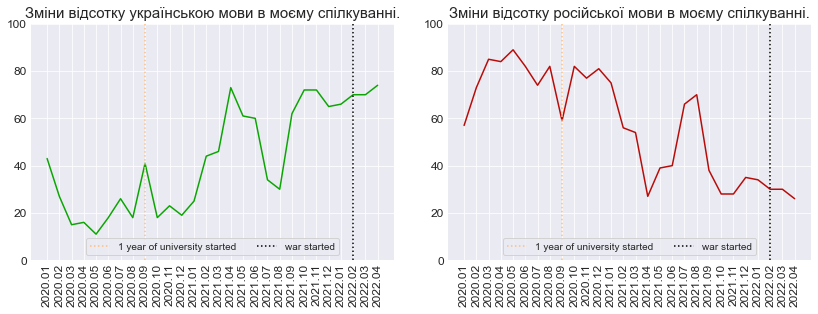

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(monthly_changes_lang_df['uk_percentage'].transpose(), color='#0BA603')
axes[0].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é –º–æ–≤–∏ –≤ –º–æ—î–º—É —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—ñ.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#FFBF81', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )

axes[1].plot(monthly_changes_lang_df['ru_percentage'].transpose(), color='#B80C09')
axes[1].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —Ä–æ—Å—ñ–π—Å—å–∫–æ—ó –º–æ–≤–∏ –≤ –º–æ—î–º—É —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—ñ.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#FFBF81', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

#### 15.2 –£—Å—ñ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è

In [215]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    month = langue_df[(langue_df['from_id']!=my_id) & (langue_df['date.date'] >= start) & (langue_df['date.date']<end)]
    ru.append(month[month['langue']=='ru']['message'].count())
    uk.append(month[month['langue']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [216]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

ru     uk   total  ru_percentage  uk_percentage
columns                                                           
2020 Jan          520   1398    1918           27.0           73.0
2020 February     950   1535    2485           38.0           62.0
2020 March       1054   1750    2804           38.0           62.0
2020 April        877   1619    2496           35.0           65.0
2020 May          645   1439    2084           31.0           69.0
2020 June         441   1362    1803           24.0           76.0
2020 July         410   1204    1614           25.0           75.0
2020 August       889   1448    2337           38.0           62.0
2020 September   4980   6417   11397           44.0           56.0
2020 October    18358  14537   32895           56.0           44.0
2020 November   17722  16069   33791           52.0           48.0
2020 December   33204  15008   48212           69.0           31.0
2021 Jan        12284   7220   19504           63.0           37.0
2021 February    4014   4217    8231           49.0           51.0
2021 March       5076   5213   10289           49.0           51.0
2021 April       3269   5173    8442           39.0           61.0
2021 May         3210   3250    6460           50.0           50.0
2021 June        3965   4175    8140           49.0           51.0
2021 July        7202  13578   20780           35.0           65.0
2021 August     16183  21613   37796           43.0           57.0
2021 September  35276  31185   66461           53.0           47.0
2021 October    22207  21175   43382           51.0           49.0
2021 November   22922  22596   45518           50.0           50.0
2021 December   24206  20716   44922           54.0           46.0
2022 January    20418  20505   40923           50.0           50.0
2022 February   28430  40712   69142           41.0           59.0
2022 March      33104  73267  106371           31.0           69.0
2022 April       5800  23123   28923           20.0           80.0

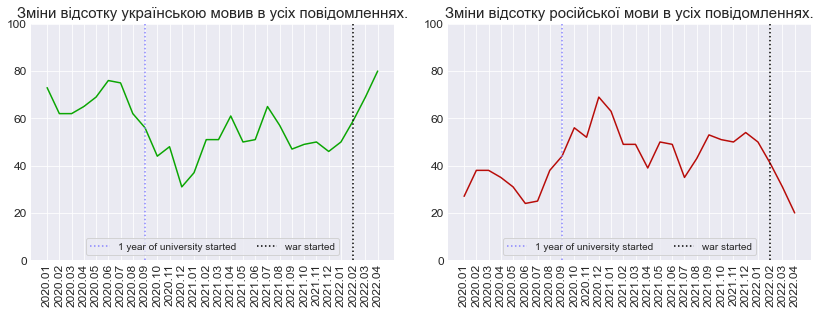

In [393]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(monthly_changes_lang_df['uk_percentage'].transpose(), color='#0BA603')
axes[0].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é –º–æ–≤–∏–≤ –≤ —É—Å—ñ—Ö –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è—Ö.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#8884FF', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )

axes[1].plot(monthly_changes_lang_df['ru_percentage'].transpose(), color='#B80C09')
axes[1].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —Ä–æ—Å—ñ–π—Å—å–∫–æ—ó –º–æ–≤–∏ –≤ —É—Å—ñ—Ö –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è—Ö.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#8884FF', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

### 16. –ó–º—ñ–Ω–∞ –≤—ñ–¥—Å–æ—Ç–∫—É —Ä–æ—Å—ñ–π—Å—å–∫–æ–º–æ–≤–Ω–∏—Ö —Ç–∞ —É–∫—Ä–∞—ó–Ω–æ–º–æ–≤–Ω–∏—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –∑ —á–∞—Å–æ–º/–∫–æ—Ä—Ä–µ–ª—è—Ü—ñ—è –∑ –≤—ñ–π–Ω–æ—é —Ç–∞ –≤—Å—Ç—É–ø–æ–º —É –ú–æ–≥–∏–ª—è–Ω–∫—É

In [284]:
def define_language(df_lang):
    names = []
    ru = []
    uk = []

    for from_id in df_lang['from_id'].unique():
        if from_id!='nan' and from_id!='PeerUser(user_id=1419351245)':
            names.append(from_id)
            ru.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='ru')]['message'].count())
            uk.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='uk')]['message'].count())
    
    people_chats_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})
    people_chats_lang_df['total'] = people_chats_lang_df['uk'] + people_chats_lang_df['ru']
    mostly_ukrainian = people_chats_lang_df[people_chats_lang_df['uk']/people_chats_lang_df['total'] >= 0.65]
    mostly_russian = people_chats_lang_df[people_chats_lang_df['ru']/people_chats_lang_df['total'] >= 0.65]
    equally = people_chats_lang_df[(people_chats_lang_df['uk']/people_chats_lang_df['total'] < 0.55 ) & (people_chats_lang_df['uk']/people_chats_lang_df['total'] > 0.45 )]
    mostly_ukrainian = mostly_ukrainian['name'].count()
    mostly_russian = mostly_russian['name'].count()
    equally = equally['name'].count()
    return mostly_ukrainian, mostly_russian, equally

In [286]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

equal = []
russian = []
ukrainian = []

while start < max_date:
    my_lang = df_lang[(df_lang['date.date'] >= start) & (df_lang['date.date']<end)]
    uk, ru, eq = define_language(my_lang)
    equal.append(eq)
    russian.append(ru)
    ukrainian.append(uk)
    start=end
    end=end+relativedelta(months=+1)
    
result = pd.DataFrame({'uk':ukrainian, 'ru':russian, 'eq':equal})

uk   ru  eq
0    46   67  12
1    64  104   9
2    59   89   7
3    22   37   3
4    39   56   3
5    37   40   4
6    29   27   1
7    39   69   3
8   103   82  10
9    82   88  12
10  106   90  10
11   78  131  16
12   83   91  17
13   87   84  10
14   77   80   8
15   69   54   8
16   67   75  10
17   74   94  12
18  146  112  14
19  365  191  42
20  531  334  56
21  413  246  51
22  365  212  32
23  383  235  42
24  372  212  46
25  669  326  87
26  515  139  38
27  255   49  16

In [322]:
#result.to_csv("D:/Naukma/DS/Hw/langues_months")
result['total']=result['uk'] + result['ru'] + result['eq']
result['ru_percentage']=round((result['ru']/result['total'])*100)
result['uk_percentage']=round((result['uk']/result['total'])*100)
result['eq_percentage']=round((result['eq']/result['total'])*100)
result['columns'] = columns
result.set_index('columns')

uk   ru  eq  total  ru_percentage  uk_percentage  \
columns                                                             
2020 Jan         46   67  12    125           54.0           37.0   
2020 February    64  104   9    177           59.0           36.0   
2020 March       59   89   7    155           57.0           38.0   
2020 April       22   37   3     62           60.0           35.0   
2020 May         39   56   3     98           57.0           40.0   
2020 June        37   40   4     81           49.0           46.0   
2020 July        29   27   1     57           47.0           51.0   
2020 August      39   69   3    111           62.0           35.0   
2020 September  103   82  10    195           42.0           53.0   
2020 October     82   88  12    182           48.0           45.0   
2020 November   106   90  10    206           44.0           51.0   
2020 December    78  131  16    225           58.0           35.0   
2021 Jan         83   91  17    191           48.0           43.0   
2021 February    87   84  10    181           46.0           48.0   
2021 March       77   80   8    165           48.0           47.0   
2021 April       69   54   8    131           41.0           53.0   
2021 May         67   75  10    152           49.0           44.0   
2021 June        74   94  12    180           52.0           41.0   
2021 July       146  112  14    272           41.0           54.0   
2021 August     365  191  42    598           32.0           61.0   
2021 September  531  334  56    921           36.0           58.0   
2021 October    413  246  51    710           35.0           58.0   
2021 November   365  212  32    609           35.0           60.0   
2021 December   383  235  42    660           36.0           58.0   
2022 January    372  212  46    630           34.0           59.0   
2022 February   669  326  87   1082           30.0           62.0   
2022 March      515  139  38    692           20.0           74.0   
2022 April      255   49  16    320           15.0           80.0   

                eq_percentage  
columns                        
2020 Jan                 10.0  
2020 February             5.0  
2020 March                5.0  
2020 April                5.0  
2020 May                  3.0  
2020 June                 5.0  
2020 July                 2.0  
2020 August               3.0  
2020 September            5.0  
2020 October              7.0  
2020 November             5.0  
2020 December             7.0  
2021 Jan                  9.0  
2021 February             6.0  
2021 March                5.0  
2021 April                6.0  
2021 May                  7.0  
2021 June                 7.0  
2021 July                 5.0  
2021 August               7.0  
2021 September            6.0  
2021 October              7.0  
2021 November             5.0  
2021 December             6.0  
2022 January              7.0  
2022 February             8.0  
2022 March                5.0  
2022 April                5.0

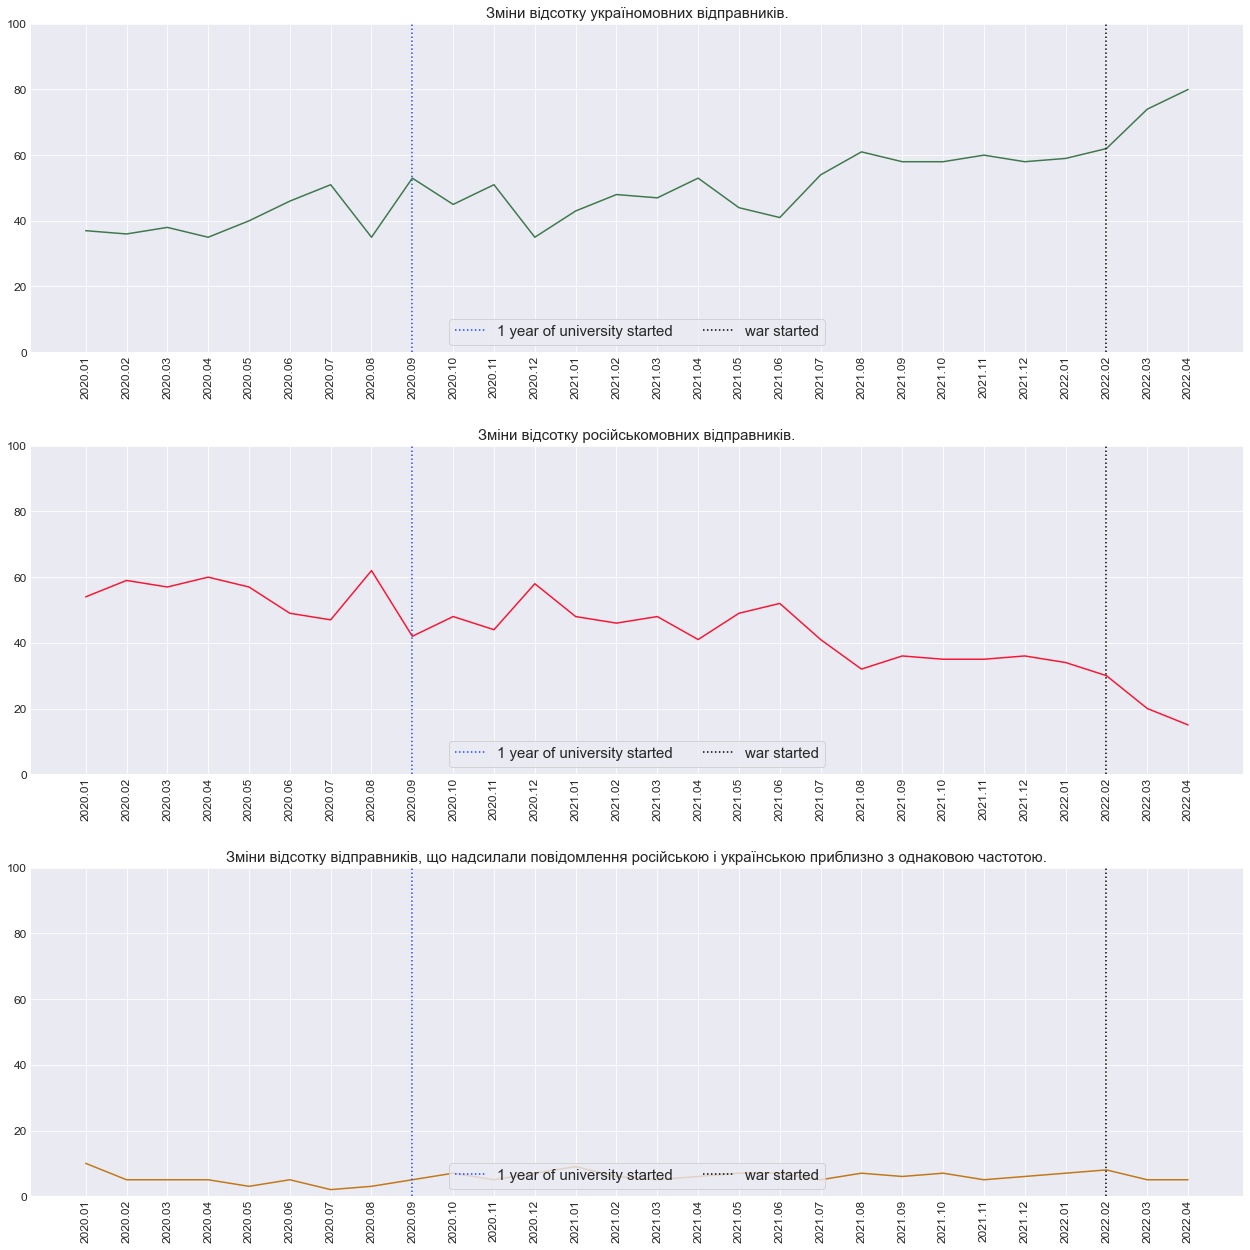

In [308]:
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

axes[0].plot(result['uk_percentage'].transpose(), color='#3F784C')
axes[0].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —É–∫—Ä–∞—ó–Ω–æ–º–æ–≤–Ω–∏—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )

axes[1].plot(result['ru_percentage'].transpose(), color='#F71735')
axes[1].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É —Ä–æ—Å—ñ–π—Å—å–∫–æ–º–æ–≤–Ω–∏—Ö –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )

axes[2].plot(result['eq_percentage'].transpose(), color='#C17817')
axes[2].set_title('–ó–º—ñ–Ω–∏ –≤—ñ–¥—Å–æ—Ç–∫—É –≤—ñ–¥–ø—Ä–∞–≤–Ω–∏–∫—ñ–≤, —â–æ –Ω–∞–¥—Å–∏–ª–∞–ª–∏ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è —Ä–æ—Å—ñ–π—Å—å–∫–æ—é —ñ —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—é –ø—Ä–∏–±–ª–∏–∑–Ω–æ –∑ –æ–¥–Ω–∞–∫–æ–≤–æ—é —á–∞—Å—Ç–æ—Ç–æ—é.', fontsize = 15)
axes[2].set_xticks(range(0,28))
axes[2].set_yticks(range(0,101,20))
axes[2].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[2].set_yticklabels(range(0,101,20), fontsize=12)
axes[2].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[2].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[2].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

## 17. –°–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏ —É –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—è—Ö 

In [127]:
from utils.dict_manipulation import get_ua_tonality_dict_combined, get_ru_tonality_dict
from utils.date import get_day_and_hour, get_week_day_from_number
from plotly.subplots import make_subplots

In [128]:
def calculate_msg_sentiment(msg, lang):
    if not isinstance(msg, str):
        return 0
    elif lang == "uk":
        tonality_dict = tonality_dict_ua
    elif lang == "ru":
        tonality_dict = tonality_dict_ru
    tokenized_msg = msg.split()
    overall_sentiment = 0
    words_num = 0
    for token in tokenized_msg:
        token_sentiment = tonality_dict.get(token.lower(), 0)
        if token_sentiment:
            overall_sentiment += token_sentiment
    words_num += 1
    avg_sentiment = overall_sentiment / words_num
    return avg_sentiment


def add_dialog_sentiment(data):
    data['sentiment'] = data.apply(lambda x: calculate_msg_sentiment(x['message'], x['lang']),axis=1)
    return data

def calculate_avg_subdialog_sentiment(data):
    grouped_data = sentiment_data_for_each_msg.groupby(
        [sentiment_data_for_each_msg['from_id'].fillna('-'),
         sentiment_data_for_each_msg['dialog_id']])
    data['avg_subdialog_sentiment'] = round(grouped_data['sentiment'].transform(lambda x: x.mean()),3)
    return data

def calculate_dialog_sentiment(data):
    grouped_data = sentiment_data_for_each_msg.groupby(
         sentiment_data_for_each_msg['dialog_id'])
    data['avg_dialog_sentiment'] = round(grouped_data['sentiment'].transform(lambda x: x.mean()),3)
    return data


def add_hour_and_dayoweek(data):
    data[['hour_of_day', 'day_of_week']] = data.apply(lambda x: get_day_and_hour(x['date']), axis=1,result_type="expand")
    return data

def analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week):
    grouped_by_date = data_with_hour_and_week.groupby(['from_id', 'day_of_week', 'hour_of_day'])
    finalized_data = grouped_by_date['avg_dialog_sentiment'].mean().round(3).reset_index()
    return finalized_data

def analyze_sentiment_for_hour_and_dayoweek2(data_with_hour_and_week):
    grouped_by_date = data_with_hour_and_week.groupby(['from_id', 'day_of_week', 'hour_of_day'])
    finalized_data = grouped_by_date['avg_subdialog_sentiment'].mean().round(3).reset_index()
    return finalized_data

In [129]:
tonality_dict_ua = get_ua_tonality_dict_combined()
tonality_dict_ru = get_ru_tonality_dict()

In [133]:
df_lang = df_lang[df_lang['lang'].isin(['ru','uk'])]
sentiment_data_for_each_msg = add_dialog_sentiment(df_lang)
dialog_sentiment_data = calculate_dialog_sentiment(sentiment_data_for_each_msg)
data_with_hour_and_week = add_hour_and_dayoweek(dialog_sentiment_data)
final_sentiment_data = analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week)

In [136]:
sentiment_data_for_each_msg.to_csv("D:/Naukma/DS/Hw/sentiments")

In [138]:
sentiment_data_for_each_msg['date.date'] = pd.to_datetime(sentiment_data_for_each_msg['date.date']).dt.date

#### –ø–æ –º—ñ—Å—è—Ü—è–º

In [139]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)


means = []
while start < max_date:
    month = sentiment_data_for_each_msg[(sentiment_data_for_each_msg['from_id'] == my_id) & (sentiment_data_for_each_msg['date.date'] >= start) & (sentiment_data_for_each_msg['date.date']<end)]
    month_mean = month['sentiment'].mean()
    means.append(month_mean)
    start=end
    end=end+relativedelta(months=+1)

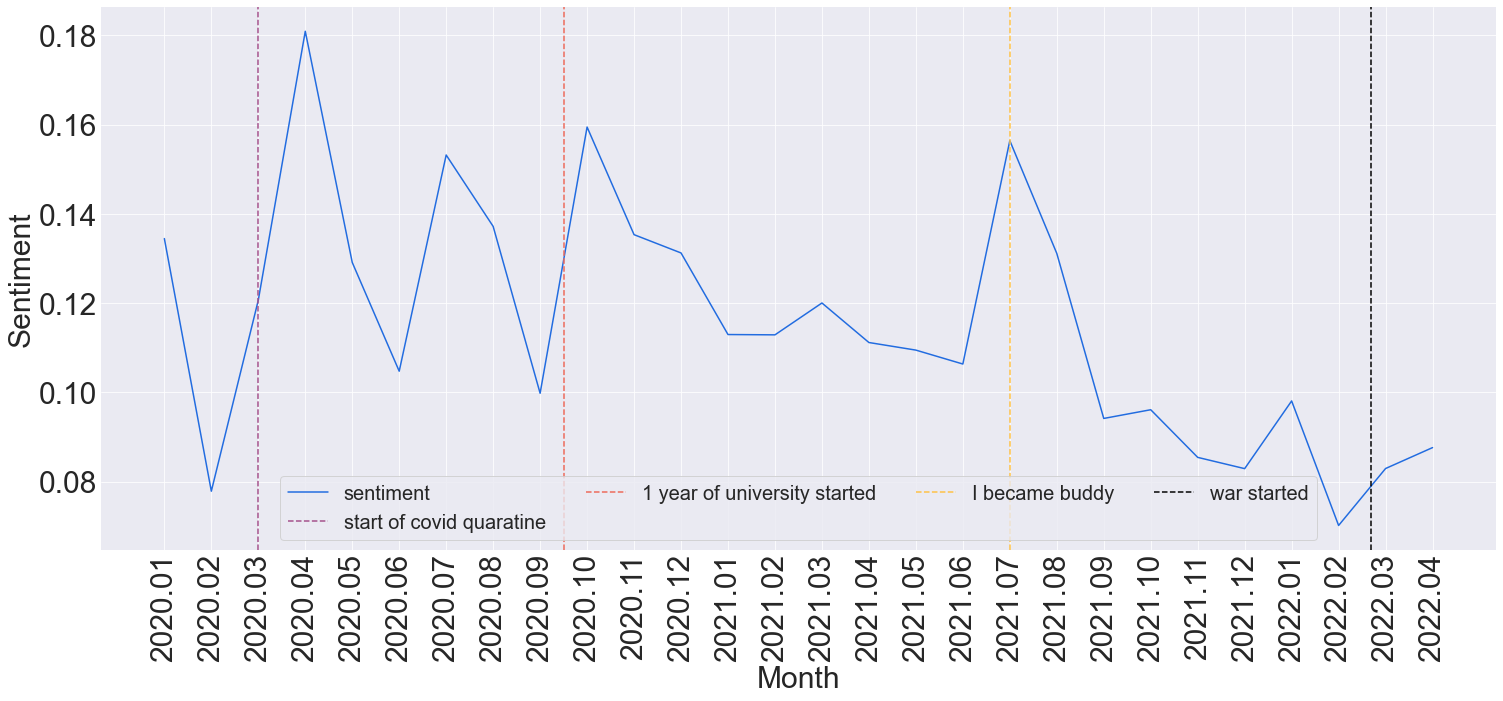

In [168]:
months_sentiment_df = pd.DataFrame({'sentiment':means})
months_sentiment_df.plot(color='#226CE0')
plt.xticks(range(0,28), columns_numeric, rotation = 90)
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.rcParams["figure.figsize"] = (25, 10)
plt.axvline(x = 2, linestyle ='--', color = '#A4508B', label = 'start of covid quaratine')
plt.axvline(x = 8.5, linestyle ='--', color = '#ED6A5A', label = '1 year of university started')
plt.axvline(x = 18, linestyle ='--', color = '#FFC145', label = 'I became buddy')
plt.axvline(x = 25.7, linestyle ='--', color = '#000000', label = 'war started')
plt.legend(loc = "lower center", frameon = True, fontsize = 20, ncol=4 )